In [1]:
# for dataframes
import pandas as pd
import random
import ast # for literal evaluation of string
import datetime
import numpy as np

# for plots
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
# sns.set()

# Analysing the data of business:

In [2]:
df_business = pd.read_csv('data_clean/business_clean.csv')
df_business.columns
df_business.head(3)

Index(['attributes', 'business_id', 'categories', 'city', 'hours', 'is_open',
       'name', 'review_count', 'stars'],
      dtype='object')

,attributes,business_id,categories,city,hours,is_open,name,review_count,stars
0,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...",f9NumwFMBDn751xgFiRbNA,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",Cornelius,"{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",1,The Range At Lake Norman,36,3.5
1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...",Yzvjg0SayhoZgCljUJRF9Q,"Health & Medical, Fitness & Instruction, Yoga,...",Scottsdale,no_hours_info,1,"Carlos Santo, NMD",4,5.0
2,no_attributes,XNoUzKckATkOD1hP6vghZg,"Pets, Pet Services, Pet Groomers",Montreal,no_hours_info,1,Felinus,5,5.0


In [3]:
print(f'Total amount of entries: {df_business.shape[0]} ')

Total amount of entries: 209393 


## Categoreis of business:

In [4]:
# Extract all categories from str and save a Series od unique categories in a tuple:
l_cat = [] # empty list to collect all categories
for line in list(df_business.categories):
    list_add = [x.strip() for x in line.split(',')]
    l_cat.extend(list_add)
unique_cat = set(l_cat) # variable unique_cat is a set of all unique categories of business
print(f'Number of unique categories is: {len(unique_cat)}')

try:
    df_cat = pd.read_csv('data_clean/categories.csv', index_col ='category')
    df_cat.head(15)
except:
    # datafarame with unique categories and their frequency:
    df_cat = pd.DataFrame()
    for cat in list(unique_cat):
        df_line = pd.DataFrame([l_cat.count(cat)], index=[cat], columns=['count'])
        df_cat = df_cat.append(df_line).sort_values(by=['count'], ascending=False)
    df_cat.head(10)

    # Add averaged star (raiting) for every category
    df_cat["stars"] = ""
    for cat in list(df_cat.index):
        raiting = float(0)
        l_index = 0
        count=0
        for line in list(df_business.categories):
            l_index += 1
            if cat in line:
                try:
                    raiting += df_business.stars[l_index]
                except:
                    pass
                count = count + 1
        raiting = raiting/count
        df_cat.stars.loc[str(cat)] = raiting
        print(  f'Number od {cat} shop: {count},\nAverage raiting: {raiting:.2f}\n')
        print('-*-'*20)
    df_cat['category'] = df_cat.index
    df_cat.to_csv('data_clean/categories.csv',index=False)

Number of unique categories is: 1337


,count,stars
category,,
Restaurants,63944,3.530894
Shopping,34644,3.541782
Food,32991,3.541239
Home Services,22487,3.545826
Beauty & Spas,20520,3.543933
Health & Medical,19227,3.534327
Local Services,15783,3.551131
Automotive,14720,3.541067
Nightlife,14211,3.532475


Text(0.5, 1.0, 'The highest average and the lowest average stars (averaged over categories)')

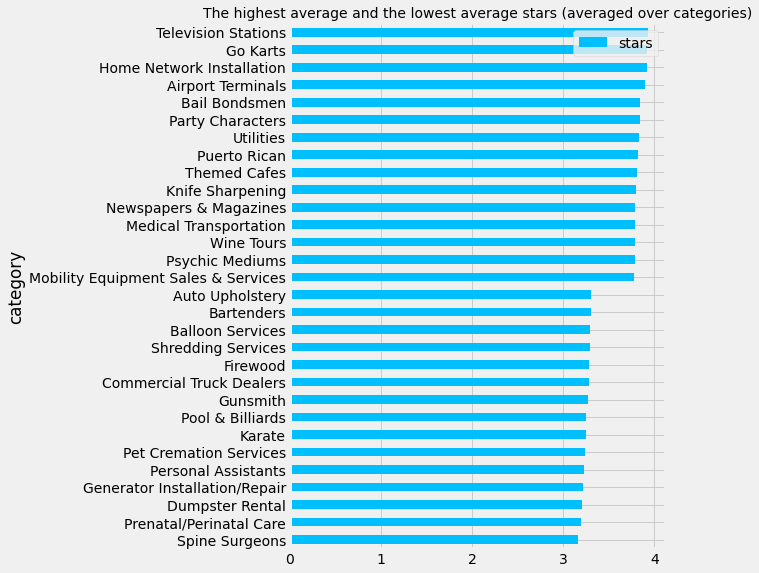

In [5]:
# Plot the highest average and the lowest average stars (averaged over categories)
df_plot = df_cat[df_cat['count']>30].stars.sort_values(ascending=True).iloc[pd.np.r_[0:15, -15:0]]
plt.title('The highest average and the lowest average stars (averaged over categories)',size=14)
df_plot.plot.barh(color='deepskyblue', legend=True, logx=False, figsize=(6,9))
plt.savefig('stars.jpg', dpi=300)

Text(0.5, 1.0, 'The most and the least common categories of business')

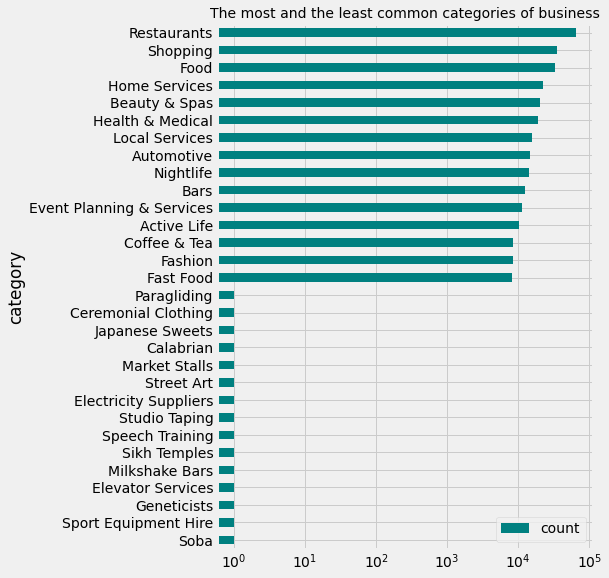

In [6]:
# the highest average and the lowest average stars (averaged over categories)
df_plot = df_cat['count'].sort_values(ascending=True).iloc[pd.np.r_[0:15, -15:0]]
plt.title('The most and the least common categories of business',size=14)
df_plot.plot.barh(color='teal', legend=True, logx=False, figsize=(6,9))
plt.xscale('log')
plt.savefig('fig\categories.jpg', dpi=300, bbox_inches = "tight")

Text(0.5, 1.0, 'Percent of closed and open shops, grouped by average star raiting on Yelp')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

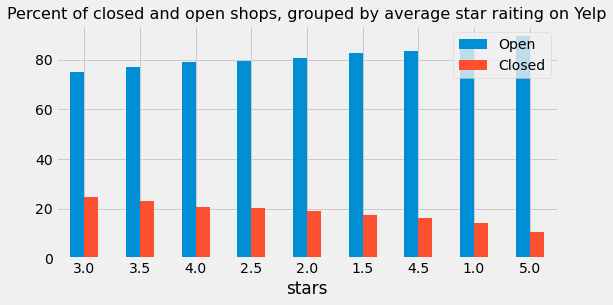

In [7]:
df_b_star_open = df_business.pivot_table(
    values='is_open', index=['stars'], aggfunc=np.mean)
df_b_star_open['closed_shops'] = (1 - df_b_star_open.is_open)
df_b_star_open = df_b_star_open.sort_values(
    by=['closed_shops'], ascending=False)
df_b_star_open *= 100
df_b_star_open.plot(kind='bar', legend=True, figsize=(8,4))
plt.title('Percent of closed and open shops, grouped by average star raiting on Yelp', size=16)
plt.legend(('Open', 'Closed'), loc='best')
plt.xticks(rotation=0)
plt.savefig('fig\Business_stars', dpi=300, bbox_inches = "tight")

In [8]:
df_b_star_open.closed_shops.round(0)

stars
3.0    25.0
3.5    23.0
4.0    21.0
2.5    20.0
2.0    19.0
1.5    17.0
4.5    16.0
1.0    14.0
5.0    10.0
Name: closed_shops, dtype: float64

In [9]:
df_fashion = pd.DataFrame()
count = 0
l_index = 0
raiting = float(0)
text = 'Fashion'
for line in list(df_business.categories):
    l_index += 1
    if text in line:
        raiting += df_business.stars[l_index]
        count = count + 1
raiting = raiting/count
print(f'Number od fashion shops: {count}, \nAverage raiting: {raiting:.2f}')

# Make new column of df_business with boolean: fashion category
l_fashion = []  # empty list to collect  True and False
for line in list(df_business.categories):
    if 'Fashion' in [x.strip() for x in line.split(',')]:
        l_fashion.append(True)
    else:
        l_fashion.append(False)

df_business['fashion'] = l_fashion
df_fashion = df_business[df_business['fashion'] == True]
df_fashion = df_fashion.reset_index().drop(columns=['index'])
df_fashion.head(4)

Number od fashion shops: 8374, 
Average raiting: 3.53


,attributes,business_id,categories,city,hours,is_open,name,review_count,stars,fashion
0,"{'BusinessParking': ""{'garage': True, 'street'...",uZuh51lXu7tsrC8RAwkg1A,"Shopping, Shoe Stores, Fashion",Las Vegas,no_hours_info,0,Manolo Blahnik,32,4.5,True
1,"{'RestaurantsPriceRange2': '3', 'BikeParking':...",1wWneWD_E1pBIyVpdHMaQg,"Shopping, Shoe Stores, Fashion",Toronto,"{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",1,Air Jordan Store,9,4.0,True
2,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",PslhllUwcQFavRHp-lyMOQ,"Children's Clothing, Shopping, Outlet Stores, ...",Concord,"{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",1,Disney Store,6,3.5,True
3,"{'BusinessParking': ""{'garage': False, 'street...",oPfzMA_kA9NQwG-h-JkGzA,"Fashion, Sports Wear, Shopping, Sporting Goods...",Concord,"{'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...",1,Bass Pro Shops Outdoor World,39,3.5,True


In [10]:
df_fashion.iloc[0,:]

attributes      {'BusinessParking': "{'garage': True, 'street'...
business_id                                uZuh51lXu7tsrC8RAwkg1A
categories                         Shopping, Shoe Stores, Fashion
city                                                    Las Vegas
hours                                               no_hours_info
is_open                                                         0
name                                               Manolo Blahnik
review_count                                                   32
stars                                                         4.5
fashion                                                      True
Name: 0, dtype: object

Text(0.5, 0.98, 'Amount of open(blue) and close(orange) fashion shops grouped by average star raiting')

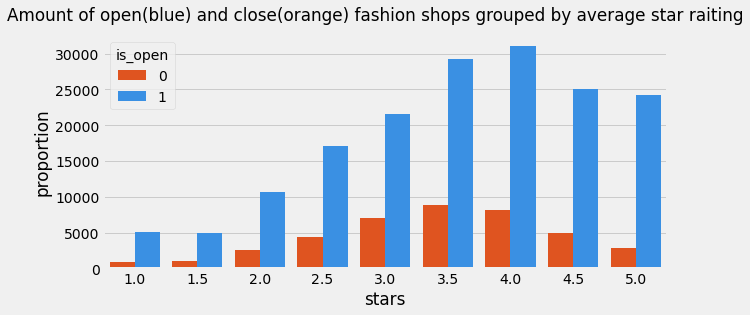

In [11]:
prop_df = (df_business.is_open
           .groupby(df_business['stars'])
           .value_counts(normalize=False)
           .rename('proportion')
           .reset_index())
fig,axes = plt.subplots(1,1,figsize=(9,4))
plt.suptitle('Amount of open(blue) and close(orange) fashion shops grouped by average star raiting')
sns.barplot(x='stars', hue='is_open', palette=['orangered','dodgerblue'], y='proportion', data=prop_df,ax=axes)

# Analysing of fashion shops:

## General statistics

Text(0.5, 1.0, 'Percent of closed and open fashion shops, \ngrouped by average star on Yelp')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

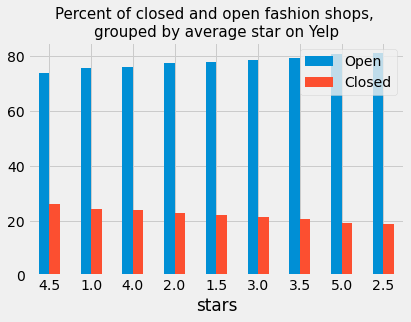

In [12]:
df_f_star_open = df_fashion.pivot_table(
    values='is_open', index=['stars'], aggfunc=np.mean)
df_f_star_open['closed_shops'] = (1 - df_f_star_open.is_open)
df_f_star_open = df_f_star_open.sort_values(
    by=['closed_shops'], ascending=False)
df_f_star_open *= 100
df_f_star_open.plot(kind='bar', legend=True, figsize=(6,4))
plt.title('Percent of closed and open fashion shops, \ngrouped by average star on Yelp', size=15)
plt.legend(('Open', 'Closed'), loc='best')
plt.xticks(rotation=0)
plt.savefig('fig\Fashion_stars.jpg', dpi=300, bbox_inches = "tight")

In [13]:
df_f_star_open.closed_shops.round(2)

stars
4.5    26.13
1.0    24.24
4.0    23.87
2.0    22.59
1.5    22.16
3.0    21.29
3.5    20.48
5.0    19.06
2.5    18.86
Name: closed_shops, dtype: float64

Text(0.5, 1.0, 'Amount of closed and open fashion shops,\n grouped by average star rating on Yelp')

Text(0, 0.5, '')

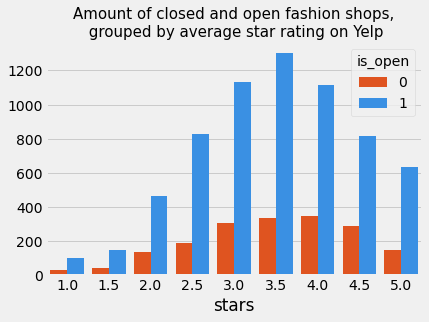

In [14]:
prop_df = (df_fashion.stars
           .groupby(df_fashion['is_open'])
           .value_counts(normalize=False)
           .rename('total_amount')
           .reset_index())
fig, ax = plt.subplots(1,1,figsize=(6,4))
sns.barplot(x='stars', hue='is_open', y='total_amount', palette=['orangered','dodgerblue'], data=prop_df, ax=ax)
plt.title('Amount of closed and open fashion shops,\n grouped by average star rating on Yelp', size=15)
plt.ylabel('')
plt.savefig('fig\Fashion_stars_amount.jpg', dpi=300, bbox_inches = "tight")

Text(0.5, 0, 'Number of reviews')

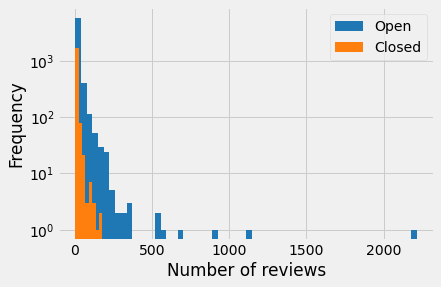

In [15]:
df_fashion[df_fashion.is_open==1].review_count.plot(kind='hist', color='tab:blue', bins=60)
df_fashion[df_fashion.is_open==0].review_count.plot(kind='hist', color='tab:orange', bins=8)
# sns.histplot(x='review_count', hue='is_open', palette=['tab:orange','tab:blue'], bins=50, data=df_fashion)
plt.legend(('Open', 'Closed'), loc='best')
plt.xlabel('Number of reviews')
plt.yscale('log')

## Extraction of additional attributes from a column: 'attributes'

The most common keys from dictionary in attributes:

In [16]:
# The most common keys from dictionary in attributes:
l_keys = []
for dict_att in df_fashion.attributes:
    try:
        l_keys.append(list(ast.literal_eval(dict_att).keys()))
    except:
        l_keys.append('No_info')
# add new column to the datafarme
l_keys = [item for sublist in l_keys for item in sublist]
# set(l_keys)

# datafarame with unique categories and their frequency:
df_keys = pd.DataFrame()
for key in list(set(l_keys)):
    df_line = pd.DataFrame([l_keys.count(key)], index=[key], columns=['count'])
    df_keys = df_keys.append(df_line).sort_values(
        by=['count'], ascending=False)
df_keys.head(10)

,count
RestaurantsPriceRange2,7110
BusinessParking,6999
BusinessAcceptsCreditCards,5691
BikeParking,5541
ByAppointmentOnly,1710
WheelchairAccessible,1290
o,1094
DogsAllowed,906
_,547
N,547


Extract information about restaurant price around the shop

Text(0.5, 1.0, 'Percentage of closed shops, grouped by restaurant price in a vicinity')

(0.0, 30.0)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

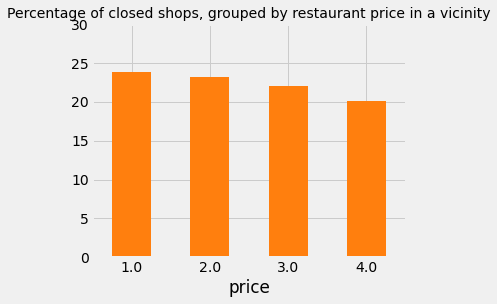

In [17]:
#Extract information about restaurant price around the shop
price = []
for dict_att in df_fashion.attributes:
    try:
        price.append(int(ast.literal_eval(dict_att)['RestaurantsPriceRange2']))
    except:
        price.append(np.nan)
        
df_fashion['price'] = price

plot_data = df_fashion.pivot_table(values='is_open',index= ['price'], aggfunc=np.mean)
plot_data =  (1 - plot_data)*100

# Percentage of closed sjops, grouped by average star
fig, axs = plt.subplots(1, 1, figsize=(5,4))
plot_data.plot(kind='bar', color='tab:orange', legend=False, ax = axs)
plt.title('Percentage of closed shops, grouped by restaurant price in a vicinity', fontsize=14)
plt.ylim(0,30)
plt.xticks(rotation=0)

Text(0.5, 0.98, 'Count and proportion of shops closed, grouped by  average review rating on Yelp')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


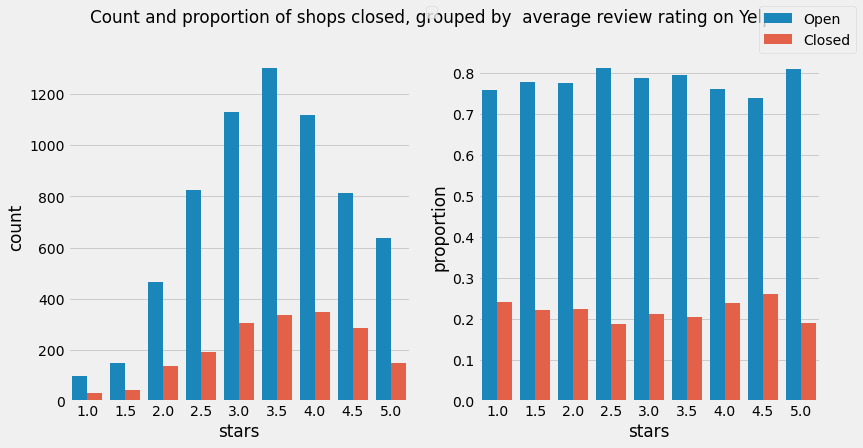

In [18]:
# plot data: total ammount and proportions of shops closed and open grouped by restaurant price
attribute = 'stars'

df = df_fashion
x, y, hue = attribute, 'proportion', 'is_open'
hue_order = [1, 0]

fig, axes = plt.subplots(1,2,figsize=(12,6))
fig.legend(('Open', 'Closed'), loc='upper center')
fig.suptitle('Count and proportion of shops closed, grouped by  average review rating on Yelp')
# first subplot
sns.countplot(x=x, hue=hue, data=df,hue_order=[1,0], ax=axes[0])
axes[0].get_legend().remove()

# second subplot
prop_df = (df[hue]
           .groupby(df[x])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df,hue_order=[1,0], ax=axes[1])
axes[1].get_legend().remove()

fig.legend(('Open', 'Closed'), loc='best')
plt.savefig('fig/Fashion_stars_all.jpg', dpi=300, bbox_inches = "tight")

Text(0.5, 0.98, 'Count and proportion of shops closed, grouped by Restaurant Price Range')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


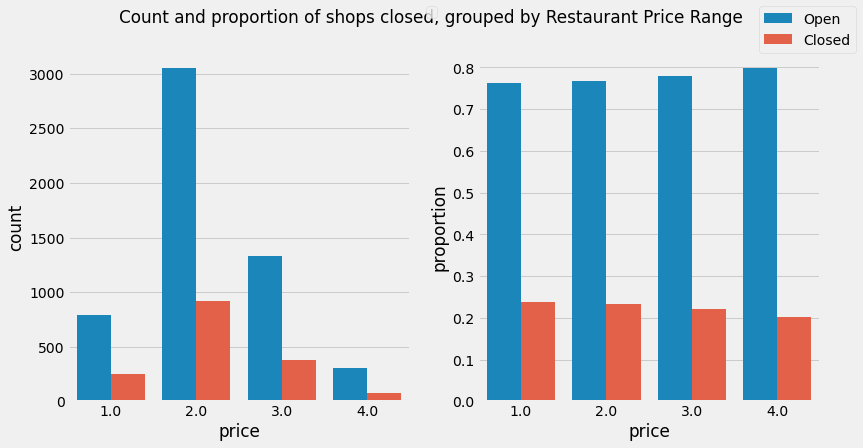

In [19]:
# plot data: total ammount and proportions of shops closed and open grouped by restaurant price
attribute = 'price'

df = df_fashion
x, y, hue = attribute, 'proportion', 'is_open'
hue_order = [1, 0]

fig, axes = plt.subplots(1,2,figsize=(12,6))
fig.legend(('Open', 'Closed'), loc='upper center')
fig.suptitle('Count and proportion of shops closed, grouped by Restaurant Price Range')
# first subplot
sns.countplot(x=x, hue=hue, data=df,hue_order=[1,0], ax=axes[0])
axes[0].get_legend().remove()

# second subplot
prop_df = (df[hue]
           .groupby(df[x])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df,hue_order=[1,0], ax=axes[1])
axes[1].get_legend().remove()

fig.legend(('Open', 'Closed'), loc='best')
plt.savefig('fig/Fashion_stars_amount.jpg', dpi=300, bbox_inches = "tight")

In [20]:
prop_df[prop_df['is_open']==0].round(2)

,price,is_open,proportion
1,1.0,0,0.24
3,2.0,0,0.23
5,3.0,0,0.22
7,4.0,0,0.20


Text(0.5, 1.0, 'Percent of closed and open shops, grouped by average star raiting on Yelp')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

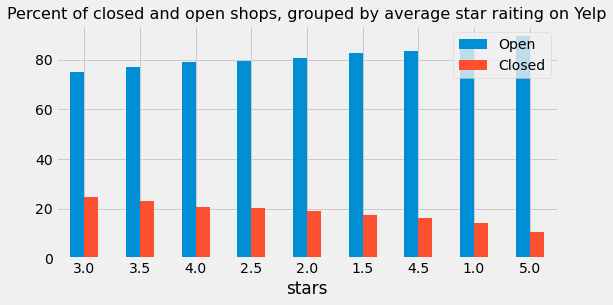

In [21]:
df_b_star_open.plot(kind='bar', legend=True, figsize=(8,4))
plt.title('Percent of closed and open shops, grouped by average star raiting on Yelp', size=16)
plt.legend(('Open', 'Closed'), loc='best')
plt.xticks(rotation=0)

Extract information about garage availability:

Text(0.5, 0.98, 'Count and proportion of shops closed, grouped by garage availability')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


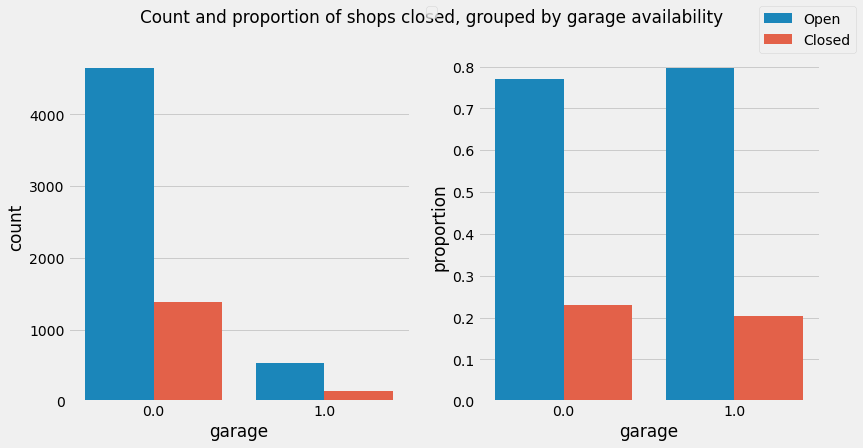

In [22]:
# extract information about avaliable garage
attribute = 'garage'
garage = []
for dict_att in df_fashion.attributes:
    try:
        garage.append(int(ast.literal_eval(ast.literal_eval(dict_att)['BusinessParking'])['garage']))
    except:
        garage.append(np.nan)
# add new column to the datafarme       
df_fashion['garage'] = garage


# plot data: total ammount and proportions of shops closed and open grouped by garage
df = df_fashion
x, y, hue = attribute, 'proportion', 'is_open'
hue_order = [1, 0]

fig, axes = plt.subplots(1,2,figsize=(12,6))
fig.legend(('Open', 'Closed'), loc='upper center')
fig.suptitle('Count and proportion of shops closed, grouped by garage availability')
# first subplot
sns.countplot(x=x, hue=hue, data=df,hue_order=[1,0], ax=axes[0])
axes[0].get_legend().remove()

# second subplot
prop_df = (df[hue]
           .groupby(df[x])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df,hue_order=[1,0], ax=axes[1])
axes[1].get_legend().remove()

fig.legend(('Open', 'Closed'), loc='best')

Text(0.5, 0.98, 'Count and proportion of shops closed, grouped by lot availability')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


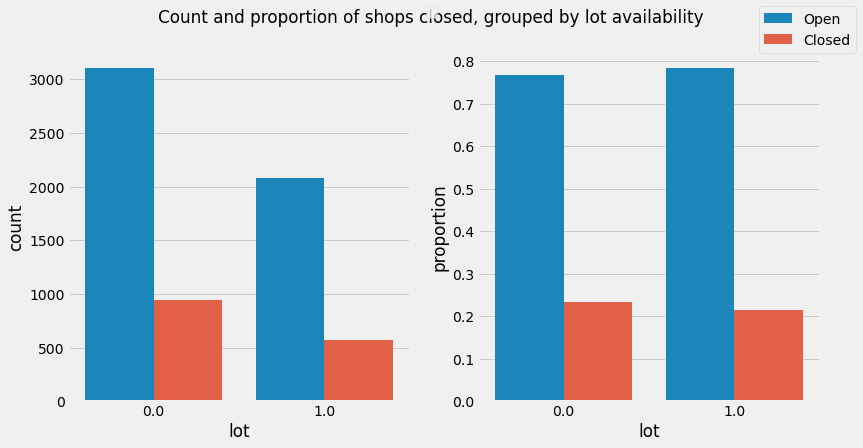

In [23]:
# extract information about avaliable garage
#Extract information about restaurant price around the shop
attribute = 'lot'
lot = []
for dict_att in df_fashion.attributes:
    try:
        lot.append(int(ast.literal_eval(ast.literal_eval(dict_att)['BusinessParking'])['lot']))
    except:
        lot.append(np.nan)
# add new column to the datafarme       
df_fashion['lot'] = lot


# plot data: total ammount and proportions of shops closed and open grouped by garage
df = df_fashion
x, y, hue = attribute, 'proportion', 'is_open'
hue_order = [1, 0]

fig, axes = plt.subplots(1,2,figsize=(12,6))
fig.legend(('Open', 'Closed'), loc='upper center')
fig.suptitle('Count and proportion of shops closed, grouped by lot availability')
# first subplot
sns.countplot(x=x, hue=hue, data=df,hue_order=[1,0], ax=axes[0])
axes[0].get_legend().remove()

# second subplot
prop_df = (df[hue]
           .groupby(df[x])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df,hue_order=[1,0], ax=axes[1])
axes[1].get_legend().remove()

fig.legend(('Open', 'Closed'), loc='best')

Extract information about parking on the street:

Text(0.5, 0.98, 'Count and proportion of shops closed, grouped by street parking availability')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


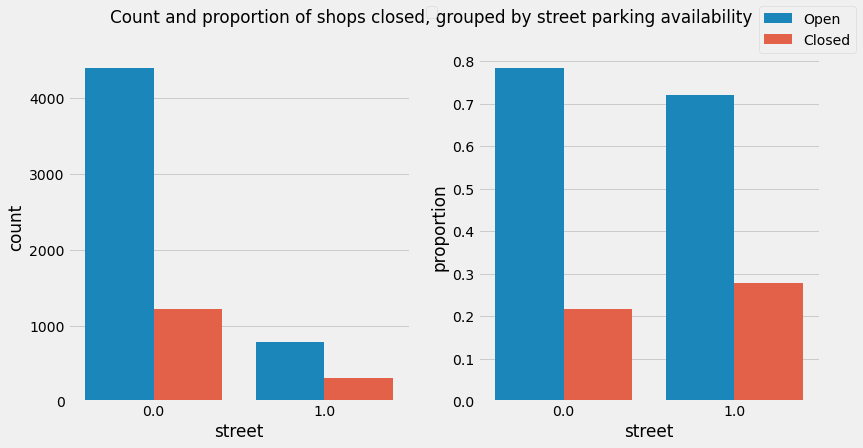

In [24]:
# extract information about avaliable street parking
#Extract information about restaurant price around the shop
attribute = 'street'
street = []
for dict_att in df_fashion.attributes:
    try:
        street.append(int(ast.literal_eval(ast.literal_eval(dict_att)['BusinessParking'])['street']))
    except:
        street.append(np.nan)
# add new column to the datafarme       
df_fashion[attribute] = street

# plot data: total ammount and proportions of shops closed and open grouped by garage
df = df_fashion
x, y, hue = attribute, 'proportion', 'is_open'
hue_order = [1, 0]

fig, axes = plt.subplots(1,2,figsize=(12,6))
fig.legend(('Open', 'Closed'), loc='upper center')
fig.suptitle('Count and proportion of shops closed, grouped by street parking availability')
# first subplot
sns.countplot(x=x, hue=hue, data=df,hue_order=[1,0], ax=axes[0])
axes[0].get_legend().remove()

# second subplot
prop_df = (df[hue]
           .groupby(df[x])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df,hue_order=[1,0], ax=axes[1])
axes[1].get_legend().remove()

fig.legend(('Open', 'Closed'), loc='best')

Text(0.5, 0.98, 'Count and proportion of shops closed, grouped by bike parking availability')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


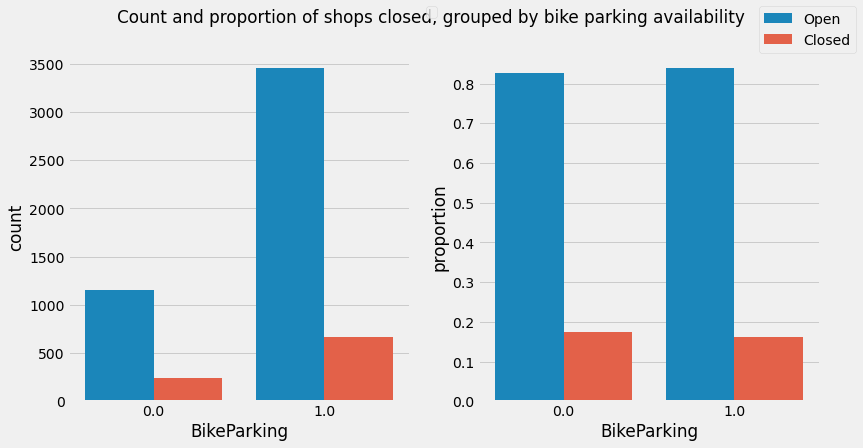

In [25]:
# extract information about avaliable street parking
#Extract information about restaurant price around the shop
attribute = 'BikeParking'
l_bike = []
for dict_att in df_fashion.attributes:
    try:
        l_bike.append(int(ast.literal_eval(ast.literal_eval(dict_att)[attribute])))
    except:
        l_bike.append(np.nan)
# add new column to the datafarme       
df_fashion[attribute] = l_bike

# plot data: total ammount and proportions of shops closed and open grouped by garage
df = df_fashion
x, y, hue = attribute, 'proportion', 'is_open'
hue_order = [1, 0]

fig, axes = plt.subplots(1,2,figsize=(12,6))
fig.legend(('Open', 'Closed'), loc='upper center')
fig.suptitle('Count and proportion of shops closed, grouped by bike parking availability')
# first subplot
sns.countplot(x=x, hue=hue, data=df,hue_order=[1,0], ax=axes[0])
axes[0].get_legend().remove()

# second subplot
prop_df = (df[hue]
           .groupby(df[x])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df,hue_order=[1,0], ax=axes[1])
axes[1].get_legend().remove()

fig.legend(('Open', 'Closed'), loc='best')
plt.savefig('fig/Bike_parking.png', dpi=300, bbox_inches = "tight")

In [26]:
prop_df[prop_df.is_open==0]

,BikeParking,is_open,proportion
1,0.0,0,0.174037
3,1.0,0,0.160922


Text(0.5, 0.98, 'Count and proportion pof shops closed, grouped by Credit Cards acceptance')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


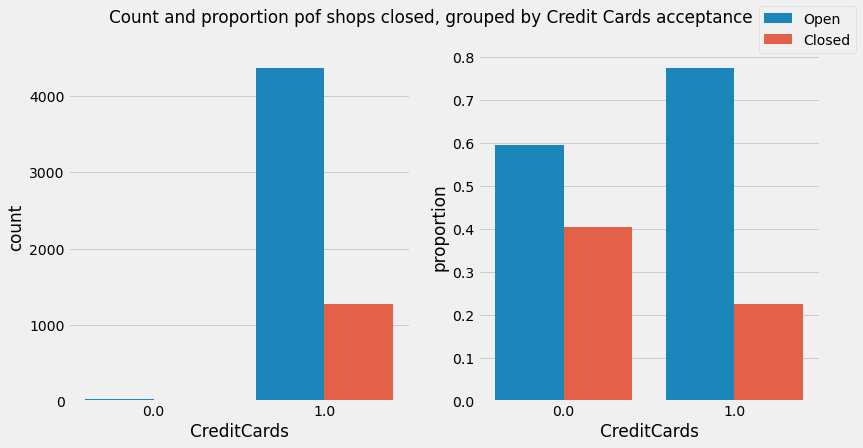

In [27]:
# extract information about avaliable street parking
#Extract information about restaurant price around the shop
attribute = 'BusinessAcceptsCreditCards'
l_CreditCards = []
for dict_att in df_fashion.attributes:
    try:
        l_CreditCards.append(int(ast.literal_eval(ast.literal_eval(dict_att)[attribute])))
    except:
        l_CreditCards.append(np.nan)
# add new column to the datafarme       
df_fashion['CreditCards'] = l_CreditCards
attribute = 'CreditCards'

# plot data: total ammount and proportions of shops closed and open grouped by garage
df = df_fashion
x, y, hue = 'CreditCards', 'proportion', 'is_open'
hue_order = [1, 0]

fig, axes = plt.subplots(1,2,figsize=(12,6))

fig.suptitle('Count and proportion pof shops closed, grouped by Credit Cards acceptance')
# first subplot
sns.countplot(x=x, hue=hue, data=df,hue_order=[1,0], ax=axes[0])
axes[0].get_legend().remove()

# second subplot
prop_df = (df[hue]
           .groupby(df[x])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df,hue_order=[1,0], ax=axes[1])
axes[1].get_legend().remove()

fig.legend(('Open', 'Closed'), loc='best')
plt.savefig('fig/Credit_card.png', dpi=300, bbox_inches = "tight")

In [28]:
prop_df[prop_df.is_open==0]


,CreditCards,is_open,proportion
1,0.0,0,0.403846
3,1.0,0,0.225732


In [29]:
# save business data as csv
df_fashion.to_csv('data_clean/fashion.csv',index=False)

## Feature engineering 

### Make groups from variable: review count

Text(0.5, 0, 'Number of reviews')

(0.0, 2500.0)

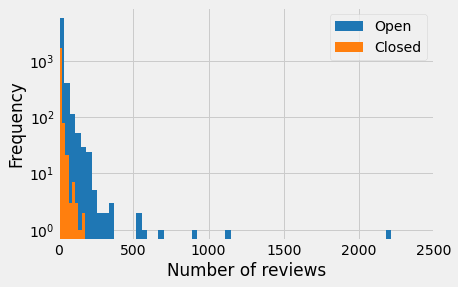

In [30]:
df_fashion[df_fashion.is_open==1].review_count.plot(kind='hist', color='tab:blue', bins=60)
df_fashion[df_fashion.is_open==0].review_count.plot(kind='hist', color='tab:orange', bins=8)
# sns.histplot(x='review_count', hue='is_open', palette=['tab:orange','tab:blue'], bins=50, data=df_fashion)
plt.legend(('Open', 'Closed'), loc='best')
plt.xlabel('Number of reviews')
plt.xlim(0, 2500)
plt.yscale('log')

In [31]:
df_copy = df_fashion.copy()
df_copy["review_count_group"] = pd.qcut(df_copy['review_count'], 3, labels=False) #[3:5], (5:11], (11:2216]))
df_fashion = df_copy.copy()
df_fashion.sample(3)

,attributes,business_id,categories,city,hours,is_open,name,review_count,stars,fashion,price,garage,lot,street,BikeParking,CreditCards,review_count_group
863,"{'RestaurantsTakeOut': 'True', 'BikeParking': ...",4ZbRwCB9oGibxK21MUZKHA,"Beauty & Spas, Delis, Grocery, Cosmetics & Bea...",Las Vegas,"{'Monday': '6:0-1:0', 'Tuesday': '6:0-1:0', 'W...",1,Smith's,96,2.5,True,2.0,0.0,1.0,0.0,1.0,1.0,2
1397,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...",-TjaRpPRwbPcWTBN3fJENw,"Shopping, Shoe Stores, Sporting Goods, Outlet ...",Chandler,"{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",1,ASICS Outlet,10,4.5,True,2.0,0.0,0.0,0.0,1.0,1.0,1
6636,"{'BikeParking': 'False', 'BusinessParking': ""{...",EeSyrbHMzwhBYc-4PU3pAQ,"Shopping, Women's Clothing, Fashion, Accessories",Monroeville,no_hours_info,1,Dress Barn,3,3.5,True,2.0,0.0,0.0,0.0,0.0,1.0,0


Text(0.5, 0.98, 'Count and proportion of shops closed, grouped by review count (3 groups)')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


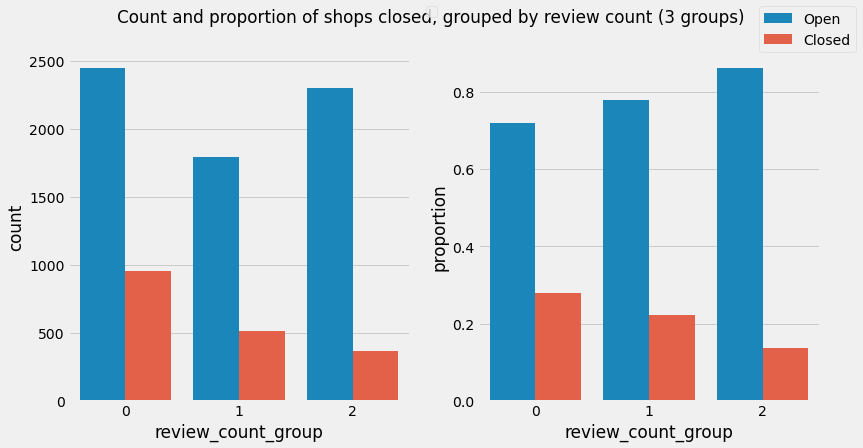

In [32]:
attribute = 'review_count_group'

# plot data: total ammount and proportions of shops closed and open grouped by garage
df = df_fashion
x, y, hue = attribute, 'proportion', 'is_open'
hue_order = [1, 0]

fig, axes = plt.subplots(1,2,figsize=(12,6))
fig.legend(('Open', 'Closed'), loc='upper center')
fig.suptitle('''Count and proportion of shops closed, grouped by review count (3 groups)''')
# first subplot
sns.countplot(x=x, hue=hue, data=df,hue_order=[1,0], ax=axes[0])
axes[0].get_legend().remove()

# second subplot
prop_df = (df[hue]
           .groupby(df[x])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df,hue_order=[1,0], ax=axes[1])
axes[1].get_legend().remove()

fig.legend(('Open', 'Closed'), loc='best')
plt.savefig('fig/Review_count_group.png', dpi=300, bbox_inches = "tight")

In [33]:
prop_df[prop_df.is_open==0]

,review_count_group,is_open,proportion
1,0,0,0.280212
3,1,0,0.221596
5,2,0,0.137983


### Extract information about working duration on Tuesday and Sunday

In [34]:
l_h_tuesday = []
for item in df_fashion.hours:
    try:
        l_h_tuesday.append(abs(pd.to_datetime(ast.literal_eval(item)['Tuesday'].split('-')[1],format='%H:%M') - 
        pd.to_datetime(ast.literal_eval(item)['Tuesday'].split('-')[0],format='%H:%M')).total_seconds()/3600)
    except:
        l_h_tuesday.append(np.nan)
        
l_h_sunday = []
for item in df_fashion.hours:
    try:
        l_h_sunday.append(abs(pd.to_datetime(ast.literal_eval(item)['Sunday'].split('-')[1],format='%H:%M') - 
        pd.to_datetime(ast.literal_eval(item)['Sunday'].split('-')[0],format='%H:%M')).total_seconds()/3600)
    except:
        l_h_sunday.append(np.nan)

In [35]:
        
df_copy = df_fashion.copy()

df_copy['h_tuesday'] = l_h_tuesday 
df_copy['h_sunday'] = l_h_sunday 

In [36]:
df_copy["h_tuesday_group"] = pd.qcut(df_copy['h_tuesday'], 3, labels=False) # [(-0.001, 8.0] < (8.0, 11.0] < (11.0, 23.75]]
df_copy["h_sunday_group"] = pd.qcut(df_copy['h_sunday'], 3, labels=False) # [(-0.001, 6.0] < (6.0, 8.0] < (8.0, 23.75]]

df_fashion = df_copy.copy()

Text(0.5, 0.98, 'Count and proportion of shops closed, grouped by working duration on Tuesday (3 groups)')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


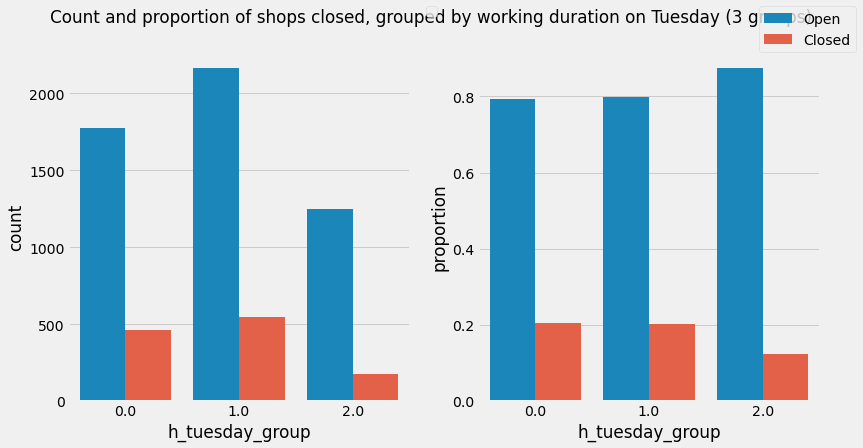

In [37]:
attribute = 'h_tuesday_group'

# plot data: total ammount and proportions of shops closed and open grouped by garage
df = df_fashion
x, y, hue = attribute, 'proportion', 'is_open'
hue_order = [1, 0]

fig, axes = plt.subplots(1,2,figsize=(12,6))
fig.legend(('Open', 'Closed'), loc='upper center')
fig.suptitle('''Count and proportion of shops closed, grouped by working duration on Tuesday (3 groups)''')
# first subplot
sns.countplot(x=x, hue=hue, data=df,hue_order=[1,0], ax=axes[0])
axes[0].get_legend().remove()

# second subplot
prop_df = (df[hue]
           .groupby(df[x])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df,hue_order=[1,0], ax=axes[1])
axes[1].get_legend().remove()

fig.legend(('Open', 'Closed'), loc='best')
plt.savefig('fig/Tueesday_group.png', dpi=300, bbox_inches = "tight")

In [38]:
prop_df[prop_df.is_open==0]

,h_tuesday_group,is_open,proportion
1,0.0,0,0.205987
3,1.0,0,0.202210
5,2.0,0,0.124563


Text(0.5, 0.98, 'Count and proportion of shops closed, grouped by working duration on Sunday (3 groups)')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


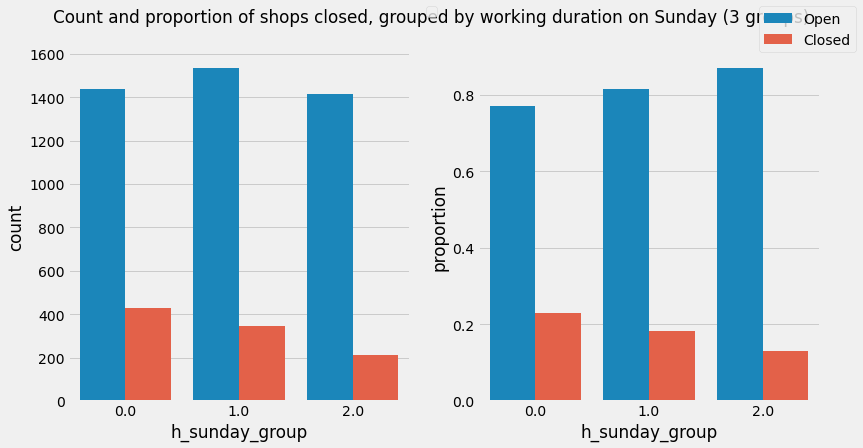

In [39]:
attribute = 'h_sunday_group'

# plot data: total ammount and proportions of shops closed and open grouped by garage
df = df_fashion
x, y, hue = attribute, 'proportion', 'is_open'
hue_order = [1, 0]

fig, axes = plt.subplots(1,2,figsize=(12,6))
fig.legend(('Open', 'Closed'), loc='upper center')
fig.suptitle('''Count and proportion of shops closed, grouped by working duration on Sunday (3 groups)''')
# first subplot
sns.countplot(x=x, hue=hue, data=df,hue_order=[1,0], ax=axes[0])
axes[0].get_legend().remove()

# second subplot
prop_df = (df[hue]
           .groupby(df[x])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df,hue_order=[1,0], ax=axes[1])
axes[1].get_legend().remove()

fig.legend(('Open', 'Closed'), loc='best')

In [40]:
prop_df[prop_df.is_open==0]

,h_sunday_group,is_open,proportion
1,0.0,0,0.229614
3,1.0,0,0.183945
5,2.0,0,0.129687


In [41]:
df_fashion.to_csv('data_clean/fashion.csv',index=False)

### Extract information about first and last chekin data

In [42]:
try:
    df_fashion = df_fashion.drop(columns=['index'])
except:
    pass
try:
    df_fashion = df_fashion.drop(columns=['fashion'])
except:
    pass
df_fashion.head(2)

,attributes,business_id,categories,city,hours,is_open,name,review_count,stars,price,garage,lot,street,BikeParking,CreditCards,review_count_group,h_tuesday,h_sunday,h_tuesday_group,h_sunday_group
0,"{'BusinessParking': ""{'garage': True, 'street'...",uZuh51lXu7tsrC8RAwkg1A,"Shopping, Shoe Stores, Fashion",Las Vegas,no_hours_info,0,Manolo Blahnik,32,4.5,4.0,1.0,0.0,0.0,1.0,1.0,2,NaN,NaN,NaN,NaN
1,"{'RestaurantsPriceRange2': '3', 'BikeParking':...",1wWneWD_E1pBIyVpdHMaQg,"Shopping, Shoe Stores, Fashion",Toronto,"{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",1,Air Jordan Store,9,4.0,3.0,0.0,0.0,0.0,1.0,NaN,1,11.0,8.0,1.0,1.0


In [43]:
df_checkin = pd.read_csv('data_clean/checkin_by_shop.csv')
df_checkin.head(3)

,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."


In [44]:
df_checkin['Date'] = [item.split(',') for item in df_checkin['date']]
try:
    df_checkin = df_checkin.drop(columns=['date'])
except:
    pass

df_checkin['Date'] = [pd.to_datetime(item) for item in df_checkin['Date']]

l_min_year = []
l_max_year = []
l_min_year = [min(item).year for item in df_checkin['Date']]
l_max_year = [max(item).year for item in df_checkin['Date']]

df_checkin['start_year'] = l_min_year
df_checkin['latest_year'] = l_max_year

df_checkin.head(2)

,business_id,Date,start_year,latest_year
0,--1UhMGODdWsrMastO9DZw,"DatetimeIndex(['2016-04-26 19:49:16', '2016-08...",2016,2019
1,--6MefnULPED_I942VcFNA,"DatetimeIndex(['2011-06-04 18:22:23', '2011-07...",2011,2019


In [45]:
# join business data with checkin data:
df_fashion= df_fashion.merge(df_checkin, on='business_id', how='left')
try:
    df_fashion = df_fashion.drop(columns=['Date'])
except:
    pass

df_fashion.head(4)
df_fashion.to_csv('data_clean/fashion.csv',index=False)

,attributes,business_id,categories,city,hours,is_open,name,review_count,stars,price,...,street,BikeParking,CreditCards,review_count_group,h_tuesday,h_sunday,h_tuesday_group,h_sunday_group,start_year,latest_year
0,"{'BusinessParking': ""{'garage': True, 'street'...",uZuh51lXu7tsrC8RAwkg1A,"Shopping, Shoe Stores, Fashion",Las Vegas,no_hours_info,0,Manolo Blahnik,32,4.5,4.0,...,0.0,1.0,1.0,2,NaN,NaN,NaN,NaN,2010.0,2016.0
1,"{'RestaurantsPriceRange2': '3', 'BikeParking':...",1wWneWD_E1pBIyVpdHMaQg,"Shopping, Shoe Stores, Fashion",Toronto,"{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",1,Air Jordan Store,9,4.0,3.0,...,0.0,1.0,NaN,1,11.0,8.0,1.0,1.0,2017.0,2019.0
2,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",PslhllUwcQFavRHp-lyMOQ,"Children's Clothing, Shopping, Outlet Stores, ...",Concord,"{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",1,Disney Store,6,3.5,2.0,...,0.0,NaN,1.0,1,11.0,7.0,1.0,1.0,2010.0,2019.0
3,"{'BusinessParking': ""{'garage': False, 'street...",oPfzMA_kA9NQwG-h-JkGzA,"Fashion, Sports Wear, Shopping, Sporting Goods...",Concord,"{'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...",1,Bass Pro Shops Outdoor World,39,3.5,2.0,...,0.0,1.0,NaN,2,12.0,9.0,2.0,2.0,2010.0,2019.0


Text(0.5, 0.98, 'Count and proportion of shops closed, grouped by latest year of checkIn')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


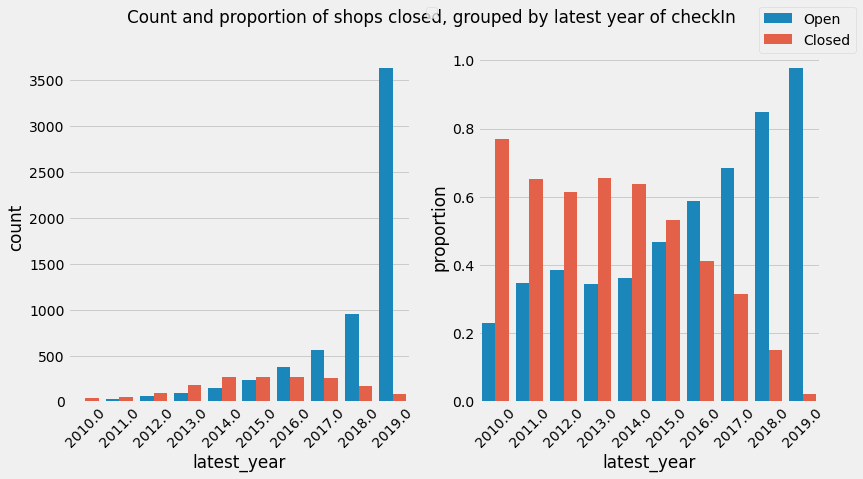

In [46]:
attribute = 'latest_year'

# plot data: total ammount and proportions of shops closed and open grouped by garage
df = df_fashion
x, y, hue = attribute, 'proportion', 'is_open'
hue_order = [1, 0]

fig, axes = plt.subplots(1,2,figsize=(12,6))
fig.legend(('Open', 'Closed'), loc='upper center')

fig.suptitle('''Count and proportion of shops closed, grouped by latest year of checkIn''')
# first subplot
f1 = sns.countplot(x=x, hue=hue, data=df,hue_order=[1,0], ax=axes[0])
axes[0].get_legend().remove()
for item in f1.get_xticklabels():
    item.set_rotation(45)

# second subplot
prop_df = (df[hue]
           .groupby(df[x])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

f2 = sns.barplot(x=x, y=y, hue=hue, data=prop_df,hue_order=[1,0], ax=axes[1])
axes[1].get_legend().remove()
for item in f2.get_xticklabels():
    item.set_rotation(45)

fig.legend(('Open', 'Closed'), loc='best')

Text(0.5, 0.98, 'Count and proportion of shops closed, grouped by first year of checkIn')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


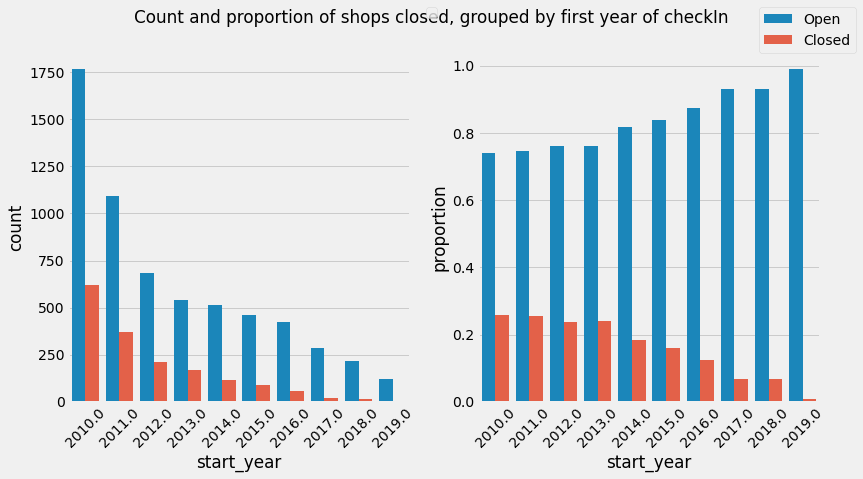

In [47]:
attribute = 'start_year'

# plot data: total ammount and proportions of shops closed and open grouped by garage
df = df_fashion
x, y, hue = attribute, 'proportion', 'is_open'
hue_order = [1, 0]

fig, axes = plt.subplots(1,2,figsize=(12,6))
fig.legend(('Open', 'Closed'), loc='upper center')

fig.suptitle('''Count and proportion of shops closed, grouped by first year of checkIn''')
# first subplot
f1 = sns.countplot(x=x, hue=hue, data=df,hue_order=[1,0], ax=axes[0])
axes[0].get_legend().remove()
for item in f1.get_xticklabels():
    item.set_rotation(45)

# second subplot
prop_df = (df[hue]
           .groupby(df[x])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

f2 = sns.barplot(x=x, y=y, hue=hue, data=prop_df,hue_order=[1,0], ax=axes[1])
axes[1].get_legend().remove()
for item in f2.get_xticklabels():
    item.set_rotation(45)

fig.legend(('Open', 'Closed'), loc='best')

In [48]:
df_fashion.to_csv('data_clean/fashion.csv',index=False)

Text(0.5, 1.0, 'closed shops')

Text(0.5, 1.0, 'Open shops')

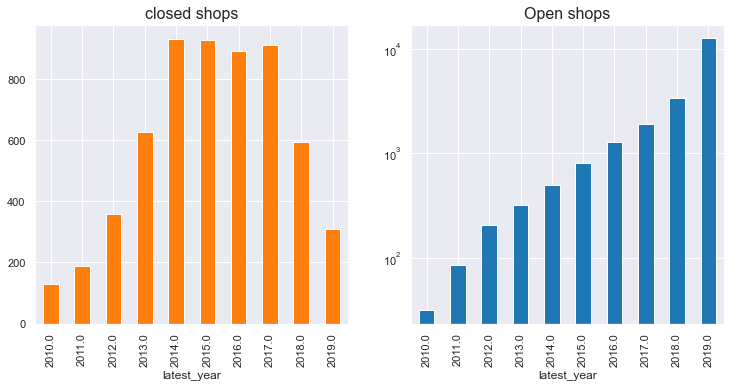

In [49]:
# Data to plot
df = pd.read_csv('data_clean/fashion.csv')
plot_data = df.pivot_table(values='stars',index= ['latest_year'], columns='is_open', aggfunc=np.sum)
# Plot
sns.set()
fig, axs = plt.subplots(1, 2, sharey=False, figsize=(11,5))
s1 = plot_data[0].plot(kind='bar', legend=False, color=['tab:orange'], ax=axs[0])
s2 = plot_data[1].plot(kind='bar', legend=False, color=['tab:blue'],logy=True, ax=axs[1])
# Plot design
axs[0].set_title('closed shops',size=16)
axs[1].set_title('Open shops',size=16)
        
plt.subplots_adjust(top=0.9)
plt.show()

Text(0.5, 1.0, 'closed shops')

Text(0.5, 1.0, 'Open shops')

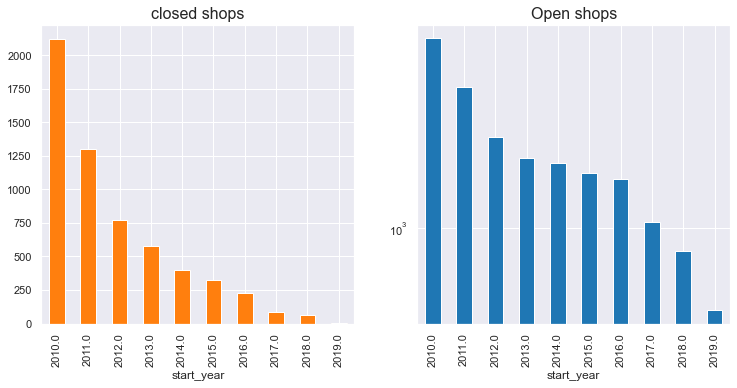

In [50]:
# Data to plot
df = pd.read_csv('data_clean/fashion.csv')
plot_data = df.pivot_table(values='stars',index= ['start_year'], columns='is_open', aggfunc=np.sum)
# Plot
sns.set()
fig, axs = plt.subplots(1, 2, sharey=False, figsize=(11,5))
s1 = plot_data[0].plot(kind='bar', legend=False, color=['tab:orange'], ax=axs[0])
s2 = plot_data[1].plot(kind='bar', legend=False, color=['tab:blue'],logy=True, ax=axs[1])
# Plot design
axs[0].set_title('closed shops',size=16)
axs[1].set_title('Open shops',size=16)
        
plt.subplots_adjust(top=0.9)
plt.show()

### Cleaning data

In [51]:
df_fashion=pd.read_csv("data_clean/fashion.csv")
df_fashion= df_fashion[['attributes', 'business_id', 'categories', 'city', 'hours',
       'name', 'review_count', 'stars', 'price', 'garage', 'street', 'lot',
       'BikeParking', 'CreditCards', 'start_year', 'latest_year',
       'review_count_group', 'h_tuesday', 'h_sunday', 'h_tuesday_group',
       'h_sunday_group', 'is_open']]
df_fashion.to_csv('data_clean/fashion.csv',index=False)

In [52]:
df_fashion.isna().sum()

attributes               0
business_id              0
categories               0
city                     0
hours                    0
name                     0
review_count             0
stars                    0
price                 1271
garage                1673
street                1678
lot                   1677
BikeParking           2852
CreditCards           2687
start_year             594
latest_year            594
review_count_group       0
h_tuesday             1992
h_sunday              3002
h_tuesday_group       1992
h_sunday_group        3002
is_open                  0
dtype: int64

In [53]:
df=pd.read_csv("data_clean/fashion.csv")

df.price = df.price.fillna(df.price.mean())
df.lot = df.lot.fillna(df.price.mean())
df.garage = df.garage.fillna(df.garage.mean())
df.street = df.street.fillna(df.street.mean())
df.BikeParking  = df.BikeParking.fillna(df.BikeParking.mean())
df.CreditCards = df.CreditCards.fillna(df.CreditCards.mean())
df.start_year = df.start_year.fillna(df.start_year.mean())
df.latest_year  = df.latest_year.fillna(df.latest_year.mean())
df.h_tuesday_group = df.h_tuesday_group.fillna(df.h_tuesday_group.mean())
df.h_sunday_group = df.h_sunday_group.fillna(df.h_sunday_group.mean())
df.h_tuesday = df.h_tuesday.fillna(df.h_tuesday.mean())
df.h_sunday = df.h_sunday.fillna(df.h_sunday.mean())

df.isna().sum()

df.to_csv('data_clean/fashion_for_DecisionTree.csv',index=False)

attributes            0
business_id           0
categories            0
city                  0
hours                 0
name                  0
review_count          0
stars                 0
price                 0
garage                0
street                0
lot                   0
BikeParking           0
CreditCards           0
start_year            0
latest_year           0
review_count_group    0
h_tuesday             0
h_sunday              0
h_tuesday_group       0
h_sunday_group        0
is_open               0
dtype: int64

## Decision Tree 

In [54]:
# Import modules:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import KFold, cross_val_score, ShuffleSplit 

In [55]:
df = pd.read_csv('data_clean/fashion_for_DecisionTree.csv')
df_copy = df.copy()
target = df['is_open']
df = df.drop(['attributes','review_count', 'business_id', 'categories', 'city', 'hours',
       'name', 'h_tuesday', 'h_sunday', 'start_year', 'latest_year'], axis = 1)
features = df.drop(['is_open'], axis = 1)

###  All features

<Figure size 864x504 with 0 Axes>

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text major ticklabel objects>)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text major ticklabel objects>)

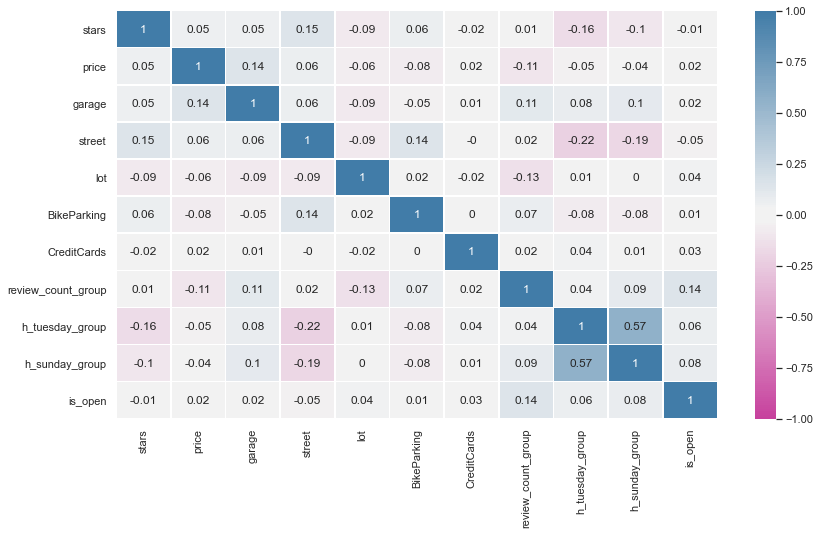

In [56]:
sns.set()
plt.figure(figsize=(12,7))
cmap_colors = sns.diverging_palette(330, 240, sep=10, n=200) # sns.color_palette("RdBu_r",200) # 'PiYG'
sns.heatmap(df.corr().round(2),vmax=1, vmin=-1,cmap=cmap_colors, 
            annot=True, robust=True, linewidths=.5); #cmap='PiYG'
plt.yticks(rotation=90)
b, t = plt.ylim() # discover the values for bottom and top
plt.yticks(rotation=0) 
plt.savefig('fig/correlation_all_data.jpg', dpi=300, bbox_inches = "tight")
plt.show()

In [57]:
df_corr = df.corr().round(2).iloc[0:(len(df.columns)-1),-1].abs().sort_values(ascending=False)
df_corr

review_count_group    0.14
h_sunday_group        0.08
h_tuesday_group       0.06
street                0.05
lot                   0.04
CreditCards           0.03
garage                0.02
price                 0.02
BikeParking           0.01
stars                 0.01
Name: is_open, dtype: float64

In [58]:
features.columns

Index(['stars', 'price', 'garage', 'street', 'lot', 'BikeParking',
       'CreditCards', 'review_count_group', 'h_tuesday_group',
       'h_sunday_group'],
      dtype='object')

In [59]:
df = pd.read_csv('data_clean/fashion_for_DecisionTree.csv')
df_copy = df.copy()
target = df['is_open']
df = df.drop(['attributes','review_count', 'business_id', 'categories', 'city', 'hours',
       'name', 'h_tuesday', 'h_sunday', 'start_year', 'latest_year'], axis = 1)
features = df.drop(['is_open'], axis = 1)

X = features.copy()
y = target.copy()

features = X.copy()      # features variable
target = y.copy()        # our target
df = X.copy()            
df['target'] = target    

RandomForestClassifier(criterion='entropy', n_estimators=1000)

Accuracy(test):0.76
Precision(test):0.72
Recall(test):0.76

Accuracy(train):0.92
Precision(train):0.92
Recall(train):0.92



Text(0.5, 1.6999999999999815, 'Predicted label')

Text(16.82, 0.5, 'True label')

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

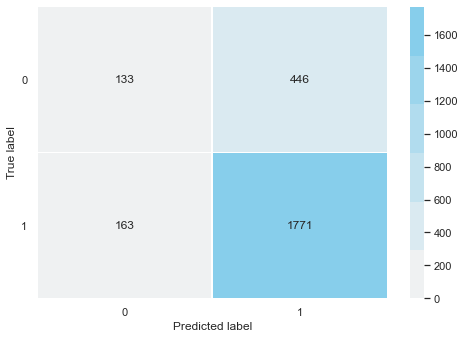

Variable: garage               Importance: 0.03
Variable: street               Importance: 0.04
Variable: lot                  Importance: 0.06
Variable: CreditCards          Importance: 0.06
Variable: BikeParking          Importance: 0.08
Variable: review_count_group   Importance: 0.09
Variable: h_tuesday_group      Importance: 0.1
Variable: h_sunday_group       Importance: 0.1
Variable: price                Importance: 0.14
Variable: stars                Importance: 0.3


[None, None, None, None, None, None, None, None, None, None]

<Figure size 432x360 with 0 Axes>

<BarContainer object of 10 artists>

([<matplotlib.axis.YTick at 0x2408228eac8>,
 [Text(0, 0, 'garage'),
  Text(0, 0, 'street'),
  Text(0, 0, 'lot'),
  Text(0, 0, 'CreditCards'),
  Text(0, 0, 'BikeParking'),
  Text(0, 0, 'review_count_group'),
  Text(0, 0, 'h_tuesday_group'),
  Text(0, 0, 'h_sunday_group'),
  Text(0, 0, 'price'),
  Text(0, 0, 'stars')])

Text(0.5, 0, 'Importance')

Text(0, 0.5, '')

Text(0.5, 1.0, 'Variable Importances')

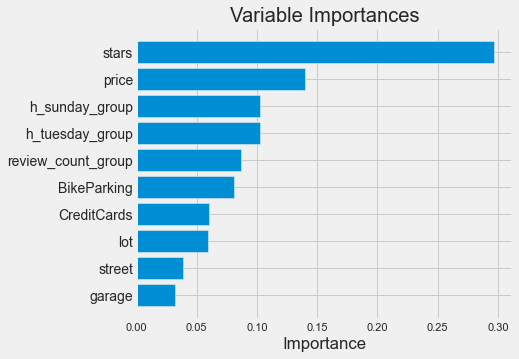

In [60]:
df = pd.read_csv('data_clean/fashion_for_DecisionTree.csv')
df_copy = df.copy()
target = df['is_open']
df = df.drop(['attributes','review_count', 'business_id', 'categories', 'city', 'hours',
       'name', 'h_tuesday', 'h_sunday', 'start_year', 'latest_year'], axis = 1)
features = df.drop(['is_open'], axis = 1)

X = features.copy()
y = target.copy()
i_split = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i_split, random_state=None)
# define the model
# Limit max depth
model = RandomForestClassifier(n_estimators=1000, criterion='entropy')
# model  = tree.DecisionTreeClassifier(random_state=None, criterion='entropy', splitter='best')
#model = DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
# fit the model
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
accuracy_train = accuracy_score(y_train, model.predict(X_train))
precision_train = precision_score(y_train, model.predict(X_train), average='weighted')
recall_train = recall_score(y_train, model.predict(X_train), average='weighted')
print(f'Accuracy(test):{accuracy:.2f}')
print(f'Precision(test):{precision:.2f}')
print(f'Recall(test):{recall:.2f}\n')
print(f'Accuracy(train):{accuracy_train:.2f}')
print(f'Precision(train):{precision_train:.2f}')
print(f'Recall(train):{recall_train:.2f}\n')


df_conf_matrix = confusion_matrix(y_test,predictions, normalize=None)
#  normalize must be one of {'true', 'pred', 'all', None}
sns.set()
f = plt.figure(figsize=(7,5))
#cmap_colors = sns.diverging_palette(500, 240, n=50) # sns.color_palette("RdBu_r",200) # 'PiYG' #(500, 240, sep=5, n=50)
#cmap_colors = sns.color_palette("Blues",10) # GnBu_d, 
# cmap_colors = sns.cubehelix_palette(16, start=0.9, rot=-0.75)
cmap_colors = sns.light_palette("skyblue", reverse=False)
f = sns.heatmap(df_conf_matrix, vmin=0,cmap=cmap_colors, fmt='g', annot=True, linewidths=0.5); #cmap='PiYG'
f.set_xlabel('Predicted label')
f.set_ylabel('True label')
f.set_yticklabels(f.get_yticklabels(), rotation=0)
plt.savefig('fig/Conf_mat_all_features.png', dpi=300, bbox_inches = "tight")
plt.show()


# Get numerical feature importances
importances = model.feature_importances_
labels = df.columns[:df.shape[1]-1].values.tolist()
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(labels, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = False)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
labels =  [x for l in feature_importances for x in l] 
labels = labels[0:len(labels):2]
# [x for l in list for x in l]
#Plot

plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,5))
# list of x locations for plotting

importances = sorted(model.feature_importances_,reverse=False)
x_values = range(len(importances))
# Make a bar chart
plt.barh(x_values, importances,align='center') # orientation = 'vertical')
# Tick labels for x axis
# plt.xticks(x_values, labels, rotation=40, size=12)
plt.yticks(x_values, labels, rotation=0, size=14)
# Axis labels and title
plt.xlabel('Importance') 
plt.ylabel('') 
plt.title('Variable Importances')
plt.savefig('fig/Importance_all_feature.png', dpi=300, bbox_inches = "tight")
plt.show()


Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

RandomForestClassifier(criterion='entropy', n_estimators=1000)

Accuracy:0.62
Precision:0.62
Recall:0.62



Text(0.5, 1.6999999999999815, 'Predicted label')

Text(16.82, 0.5, 'True label')

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

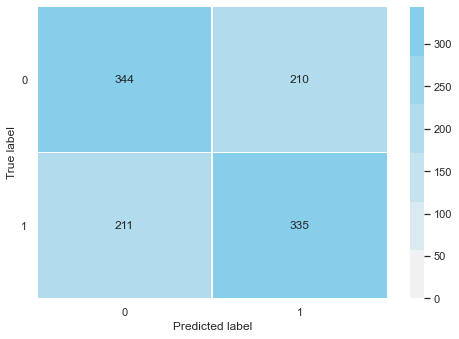

Variable: stars                Importance: 0.28
Variable: price                Importance: 0.14
Variable: h_tuesday_group      Importance: 0.11
Variable: h_sunday_group       Importance: 0.11
Variable: review_count_group   Importance: 0.09
Variable: BikeParking          Importance: 0.08
Variable: lot                  Importance: 0.06
Variable: CreditCards          Importance: 0.05
Variable: street               Importance: 0.04
Variable: garage               Importance: 0.03


[None, None, None, None, None, None, None, None, None, None]

([<matplotlib.axis.XTick at 0x2408e966948>,
 [Text(0, 0, 'stars'),
  Text(0, 0, 'price'),
  Text(0, 0, 'h_tuesday_group'),
  Text(0, 0, 'h_sunday_group'),
  Text(0, 0, 'review_count_group'),
  Text(0, 0, 'BikeParking'),
  Text(0, 0, 'lot'),
  Text(0, 0, 'CreditCards'),
  Text(0, 0, 'street'),
  Text(0, 0, 'garage')])

Text(0, 0.5, 'Importance')

Text(0.5, 0, 'Variable')

Text(0.5, 1.0, 'Variable Importances')

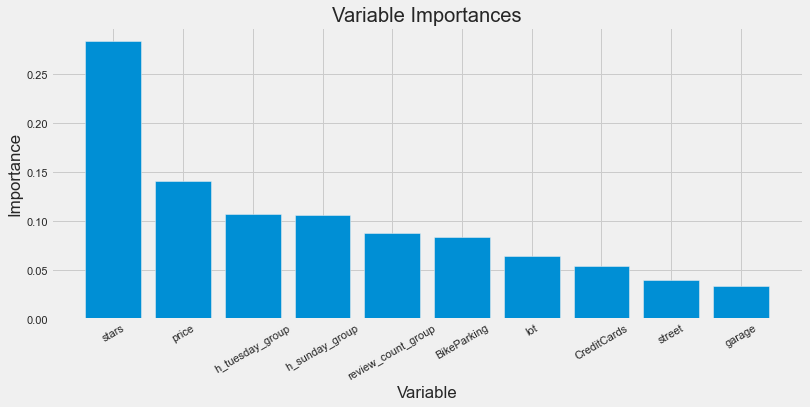

In [61]:
df = pd.read_csv('data_clean/fashion_for_DecisionTree.csv')
df_copy = df.copy()
target = df['is_open']
df = df.drop(['attributes','review_count', 'business_id', 'categories', 'city', 'hours',
       'name', 'h_tuesday', 'h_sunday', 'start_year', 'latest_year'], axis = 1)
features = df.drop(['is_open'], axis = 1)

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=None)

X = features.copy()
y = target.copy()
#With resampling (for unbalanced data)
X_resampled, y_resampled = rus.fit_sample(X, y)
X = pd.DataFrame(X_resampled, columns=X.columns)
y = pd.Series(y_resampled)
features = X.copy()      #Nur die erklärenden Variablen
target = y.copy()        #Nur die zu erklärende Variable
df = X.copy()            
df['target'] = target    #kompletter Datensatz


#Wir splitten "zufällig". D.h. wir teilen zufällt in i_split% Trainings- und Testdaten auf
i_split = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i_split, random_state=None)
# define the model
# Limit max depth
model = RandomForestClassifier(n_estimators=1000, criterion='entropy')
# model  = tree.DecisionTreeClassifier(random_state=None, criterion='entropy', splitter='best')
#model = DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
# fit the model
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='weighted')
print(f'Accuracy:{accuracy:.2f}')
print(f'Precision:{precision:.2f}')
print(f'Recall:{recall:.2f}\n')


df_conf_matrix = confusion_matrix(y_test,predictions)
sns.set()
f = plt.figure(figsize=(7,5))
#cmap_colors = sns.diverging_palette(500, 240, n=50) # sns.color_palette("RdBu_r",200) # 'PiYG' #(500, 240, sep=5, n=50)
#cmap_colors = sns.color_palette("Blues",10) # GnBu_d, 
# cmap_colors = sns.cubehelix_palette(16, start=0.9, rot=-0.75)
cmap_colors = sns.light_palette("skyblue", reverse=False)
f = sns.heatmap(df_conf_matrix, vmin=0,cmap=cmap_colors, fmt='g', annot=True, linewidths=0.5); #cmap='PiYG'
f.set_xlabel('Predicted label')
f.set_ylabel('True label')
f.set_yticklabels(f.get_yticklabels(), rotation=0)
plt.savefig('fig/Conf_mat_all_features_resampled.png', dpi=300, bbox_inches = "tight")
plt.show()


# Get numerical feature importances
importances = model.feature_importances_
labels = df.columns[:df.shape[1]-1].values.tolist()
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(labels, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
labels =  [x for l in feature_importances for x in l] 
labels = labels[0:len(labels):2]
# [x for l in list for x in l]
#Plot

plt.style.use('fivethirtyeight')
# list of x locations for plotting

importances = sorted(model.feature_importances_,reverse=True)
x_values = range(len(importances))
# Make a bar chart
fig = plt.figure(figsize=(12,5))
fir = plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, labels, rotation=30)
# Axis labels and title
plt.ylabel('Importance') 
plt.xlabel('Variable') 
plt.title('Variable Importances')
plt.savefig('fig/Importance_all_feature_resampled.png', dpi=300, bbox_inches = "tight")

plt.show()

DecisionTreeClassifier(max_leaf_nodes=6)

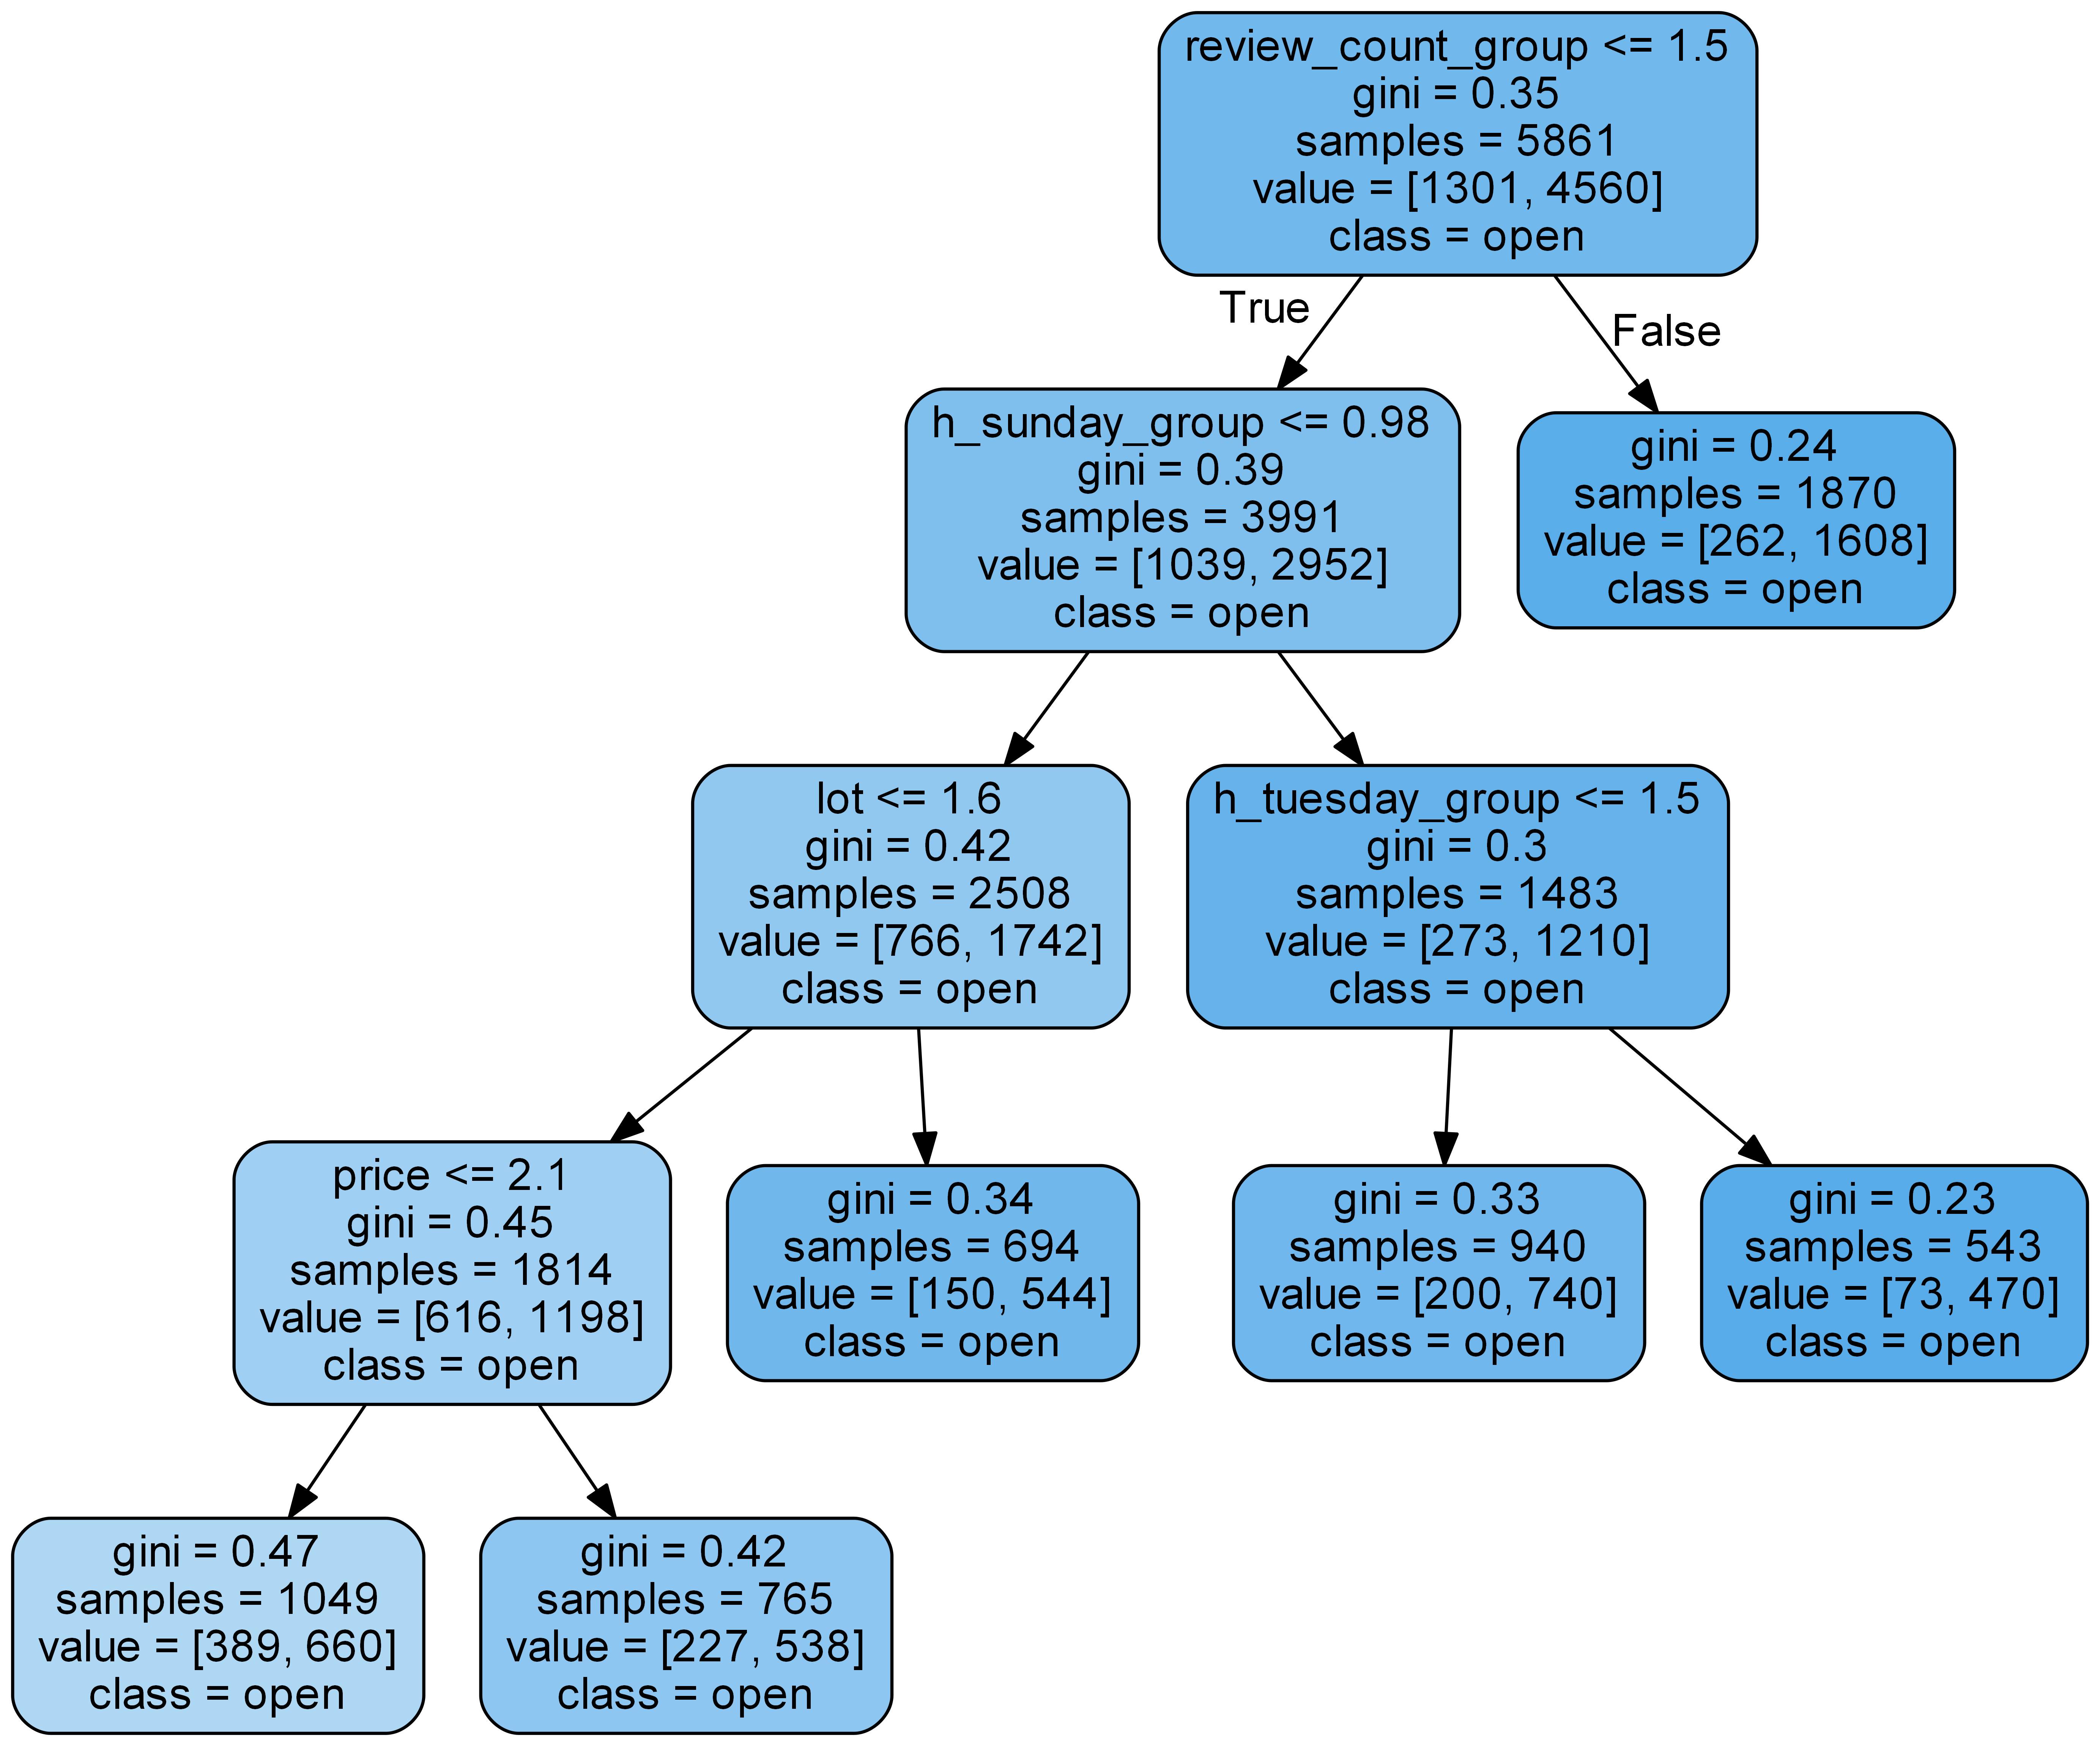

In [62]:
df = pd.read_csv('data_clean/fashion_for_DecisionTree.csv')
df_copy = df.copy()
target = df['is_open']
df = df.drop(['attributes','review_count', 'business_id', 'categories', 'city', 'hours',
       'name', 'h_tuesday', 'h_sunday', 'start_year', 'latest_year', 'BikeParking'], axis = 1)
features = df.drop(['is_open'], axis = 1)

X_resampled, y_resampled = rus.fit_sample(X, y)
X = pd.DataFrame(X_resampled, columns=X.columns)
y = pd.Series(y_resampled)

X = features.copy()
y = target.copy()

i_split = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i_split, random_state=None)

model_for_graph  = tree.DecisionTreeClassifier(random_state=None, criterion='gini', splitter='best',
        min_samples_leaf=1,  max_leaf_nodes=6)
model_for_graph.fit(X_train, y_train)
predictions = model_for_graph.predict(X_test)

export_graphviz(model_for_graph, out_file='tree_test.dot', 
                feature_names = list(features.columns), class_names = ['close', 'open'],
                rounded = True, proportion = False, precision = 2, filled = True)

!dot -Tpng tree_test.dot -o tree_test.png -Gdpi=600
Image(filename = 'tree_test.png', width=500)

### Without variable: star (raiting on Yelp)

In [63]:
df = pd.read_csv('data_clean/fashion_for_DecisionTree.csv')
df_copy = df.copy()
target = df['is_open']
df = df.drop(['attributes','review_count', 'start_year', 'latest_year',
              'business_id', 'stars','categories', 'city', 
              'hours','name', 'h_tuesday','review_count_group', 'h_sunday', 'BikeParking'], axis = 1)
features = df.drop(['is_open'], axis = 1)

# ['attributes', 'business_id', 'categories', 'city', 'hours', 'name', 'review_count', 'stars', 'price', 'garage', 'street', 'lot',
# 'BikeParking', 'CreditCards', 'start_year', 'latest_year','review_count_group', 'h_tuesday', 'h_sunday', 'h_tuesday_group',
# 'h_sunday_group', 'is_open']

In [64]:
features.columns

Index(['price', 'garage', 'street', 'lot', 'CreditCards', 'h_tuesday_group',
       'h_sunday_group'],
      dtype='object')

<Figure size 864x504 with 0 Axes>

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

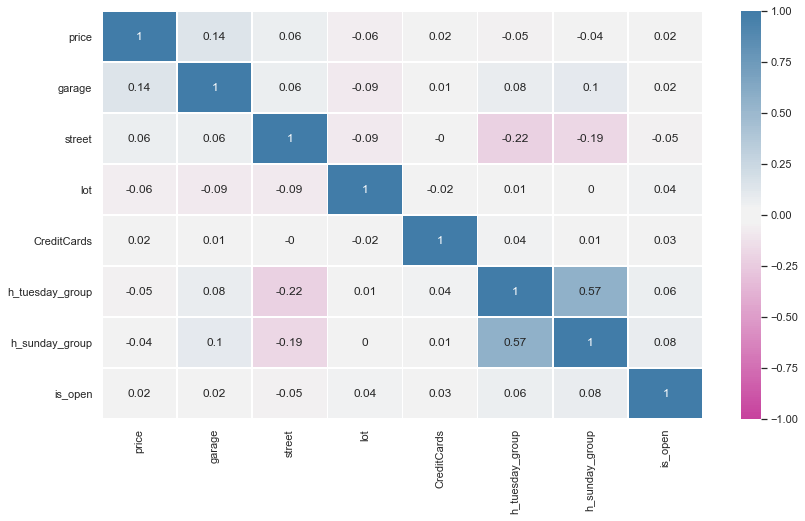

In [65]:
sns.set()
plt.figure(figsize=(12,7))
cmap_colors = sns.diverging_palette(330, 240, sep=10, n=200) # sns.color_palette("RdBu_r",200) # 'PiYG'
sns.heatmap(df.corr().round(2),vmax=1, vmin=-1,cmap=cmap_colors, 
            annot=True, robust=True, linewidths=.5); #cmap='PiYG'
plt.yticks(rotation=90)
b, t = plt.ylim() # discover the values for bottom and top
plt.yticks(rotation=0) 
plt.savefig('fig/correlation_without_reviews.jpg', dpi=300, bbox_inches = "tight")
plt.show()

RandomForestClassifier(criterion='entropy', n_estimators=1000)

Accuracy(test):0.77
Precision(test):0.73
Recall(test):0.77

Accuracy(train):0.83
Precision(train):0.82
Recall(train):0.83



Text(0.5, 1.6999999999999815, 'Predicted label')

Text(16.82, 0.5, 'True label')

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

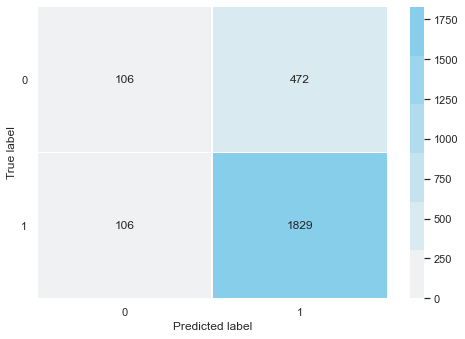

Variable: garage               Importance: 0.04
Variable: street               Importance: 0.06
Variable: lot                  Importance: 0.08
Variable: CreditCards          Importance: 0.09
Variable: h_tuesday_group      Importance: 0.16
Variable: h_sunday_group       Importance: 0.16
Variable: BikeParking          Importance: 0.18
Variable: price                Importance: 0.24


[None, None, None, None, None, None, None, None]

<Figure size 432x360 with 0 Axes>

<BarContainer object of 8 artists>

([<matplotlib.axis.YTick at 0x24082f03488>,
 [Text(0, 0, 'garage'),
  Text(0, 0, 'street'),
  Text(0, 0, 'lot'),
  Text(0, 0, 'CreditCards'),
  Text(0, 0, 'h_tuesday_group'),
  Text(0, 0, 'h_sunday_group'),
  Text(0, 0, 'BikeParking'),
  Text(0, 0, 'price')])

Text(0.5, 0, 'Importance')

Text(0, 0.5, '')

Text(0.5, 1.0, 'Variable Importances')

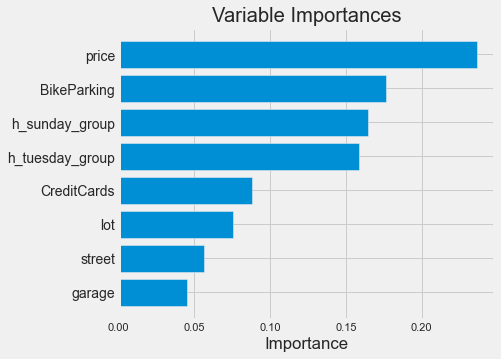

In [66]:
df = pd.read_csv('data_clean/fashion_for_DecisionTree.csv')
df_copy = df.copy()
target = df['is_open']
df = df.drop(['attributes','review_count', 'business_id', 'categories',
              'city', 'hours','name', 'h_tuesday', 'h_sunday', 'start_year',
              'latest_year', 'stars','review_count_group'], axis = 1)
features = df.drop(['is_open'], axis = 1)

X = features.copy()
y = target.copy()
i_split = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i_split, random_state=None)
# define the model
# Limit max depth
model = RandomForestClassifier(n_estimators=1000, criterion='entropy')
# model  = tree.DecisionTreeClassifier(random_state=None, criterion='entropy', splitter='best')
#model = DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
# fit the model
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
accuracy_train = accuracy_score(y_train, model.predict(X_train))
precision_train = precision_score(y_train, model.predict(X_train), average='weighted')
recall_train = recall_score(y_train, model.predict(X_train), average='weighted')

print(f'Accuracy(test):{accuracy:.2f}')
print(f'Precision(test):{precision:.2f}')
print(f'Recall(test):{recall:.2f}\n')
print(f'Accuracy(train):{accuracy_train:.2f}')
print(f'Precision(train):{precision_train:.2f}')
print(f'Recall(train):{recall_train:.2f}\n')


df_conf_matrix = confusion_matrix(y_test,predictions, normalize=None)
#  normalize must be one of {'true', 'pred', 'all', None}
sns.set()
f = plt.figure(figsize=(7,5))
#cmap_colors = sns.diverging_palette(500, 240, n=50) # sns.color_palette("RdBu_r",200) # 'PiYG' #(500, 240, sep=5, n=50)
#cmap_colors = sns.color_palette("Blues",10) # GnBu_d, 
# cmap_colors = sns.cubehelix_palette(16, start=0.9, rot=-0.75)
cmap_colors = sns.light_palette("skyblue", reverse=False)
f = sns.heatmap(df_conf_matrix, vmin=0,cmap=cmap_colors, fmt='g', annot=True, linewidths=0.5); #cmap='PiYG'
f.set_xlabel('Predicted label')
f.set_ylabel('True label')
f.set_yticklabels(f.get_yticklabels(), rotation=0)
plt.savefig('fig/Conf_mat_without_reviews.png', dpi=300, bbox_inches = "tight")
plt.show()


# Get numerical feature importances
importances = model.feature_importances_
labels = df.columns[:df.shape[1]-1].values.tolist()
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(labels, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = False)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
labels =  [x for l in feature_importances for x in l] 
labels = labels[0:len(labels):2]
# [x for l in list for x in l]
#Plot

plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,5))
# list of x locations for plotting

importances = sorted(model.feature_importances_,reverse=False)
x_values = range(len(importances))
# Make a bar chart
plt.barh(x_values, importances,align='center') # orientation = 'vertical')
# Tick labels for x axis
# plt.xticks(x_values, labels, rotation=40, size=12)
plt.yticks(x_values, labels, rotation=0, size=14)
# Axis labels and title
plt.xlabel('Importance') 
plt.ylabel('') 
plt.title('Variable Importances')
plt.savefig('fig/Importance_without_reviews.png', dpi=300, bbox_inches = "tight")
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP={0:0.2f}')

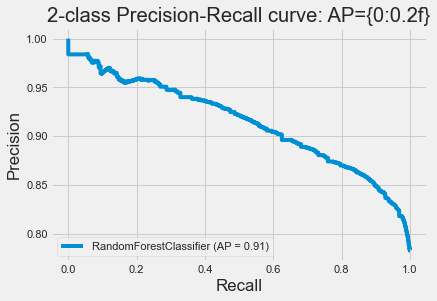

In [67]:
disp = plot_precision_recall_curve(model, X, y)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}')

RandomForestClassifier(criterion='entropy', n_estimators=10000)

Accuracy:0.62
Precision:0.62
Recall:0.62



Text(0.5, 1.6999999999999815, 'Predicted label')

Text(16.82, 0.5, 'True label')

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

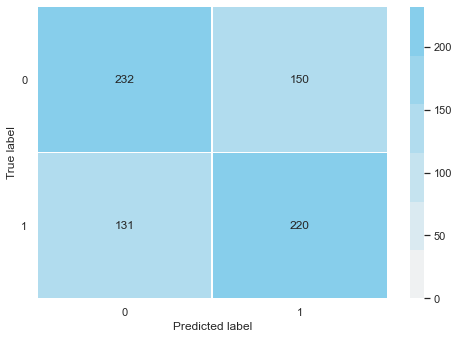

Variable: garage               Importance: 0.04
Variable: street               Importance: 0.06
Variable: lot                  Importance: 0.08
Variable: CreditCards          Importance: 0.09
Variable: h_tuesday_group      Importance: 0.16
Variable: BikeParking          Importance: 0.17
Variable: h_sunday_group       Importance: 0.17
Variable: price                Importance: 0.23


[None, None, None, None, None, None, None, None]

<Figure size 432x360 with 0 Axes>

<BarContainer object of 8 artists>

([<matplotlib.axis.YTick at 0x2408e8d0688>,
 [Text(0, 0, 'garage'),
  Text(0, 0, 'street'),
  Text(0, 0, 'lot'),
  Text(0, 0, 'CreditCards'),
  Text(0, 0, 'h_tuesday_group'),
  Text(0, 0, 'BikeParking'),
  Text(0, 0, 'h_sunday_group'),
  Text(0, 0, 'price')])

Text(0.5, 0, 'Importance')

Text(0, 0.5, '')

Text(0.5, 1.0, 'Variable Importances')

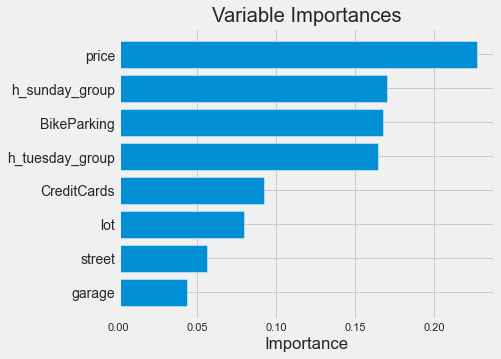

In [68]:
df = pd.read_csv('data_clean/fashion_for_DecisionTree.csv')
df_copy = df.copy()
target = df['is_open']
df = df.drop(['attributes','review_count', 'business_id', 'categories', 'city', 'hours',
       'name', 'h_tuesday', 'h_sunday', 'start_year', 'latest_year', 'stars','review_count_group'], axis = 1)
features = df.drop(['is_open'], axis = 1)

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=None)

X = features.copy()
y = target.copy()
#With resampling (for unbalanced data)
X_resampled, y_resampled = rus.fit_sample(X, y)
X = pd.DataFrame(X_resampled, columns=X.columns)
y = pd.Series(y_resampled)
features = X.copy()      #Nur die erklärenden Variablen
target = y.copy()        #Nur die zu erklärende Variable
df = X.copy()            
df['target'] = target    #kompletter Datensatz


#Random splitting
i_split = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i_split, random_state=None)
# define the model
# Limit max depth
model = RandomForestClassifier(n_estimators=10000, criterion='entropy')
# model  = tree.DecisionTreeClassifier(random_state=None, criterion='entropy', splitter='best')
#model = DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
# fit the model
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='weighted')
print(f'Accuracy:{accuracy:.2f}')
print(f'Precision:{precision:.2f}')
print(f'Recall:{recall:.2f}\n')

df_conf_matrix = confusion_matrix(y_test,predictions, normalize=None)
#  normalize must be one of {'true', 'pred', 'all', None}
sns.set()
f = plt.figure(figsize=(7,5))
#cmap_colors = sns.diverging_palette(500, 240, n=50) # sns.color_palette("RdBu_r",200) # 'PiYG' #(500, 240, sep=5, n=50)
#cmap_colors = sns.color_palette("Blues",10) # GnBu_d, 
# cmap_colors = sns.cubehelix_palette(16, start=0.9, rot=-0.75)
cmap_colors = sns.light_palette("skyblue", reverse=False)
f = sns.heatmap(df_conf_matrix, vmin=0,cmap=cmap_colors, fmt='g', annot=True, linewidths=0.5); #cmap='PiYG'
f.set_xlabel('Predicted label')
f.set_ylabel('True label')
f.set_yticklabels(f.get_yticklabels(), rotation=0)
plt.savefig('fig/Conf_mat_without_reviews_resampled.png', dpi=300, bbox_inches = "tight")
plt.show()

# Get numerical feature importances
importances = model.feature_importances_
labels = df.columns[:df.shape[1]-1].values.tolist()
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(labels, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = False)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
labels =  [x for l in feature_importances for x in l] 
labels = labels[0:len(labels):2]
# [x for l in list for x in l]
#Plot

plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,5))
# list of x locations for plotting

importances = sorted(model.feature_importances_,reverse=False)
x_values = range(len(importances))
# Make a bar chart
plt.barh(x_values, importances,align='center') # orientation = 'vertical')
# Tick labels for x axis
# plt.xticks(x_values, labels, rotation=40, size=12)
plt.yticks(x_values, labels, rotation=0, size=14)
# Axis labels and title
plt.xlabel('Importance') 
plt.ylabel('') 
plt.title('Variable Importances')
plt.savefig('fig/Importance_without_reviews_resampled.png', dpi=300, bbox_inches = "tight")
plt.show()


Text(0.5, 1.0, '2-class Precision-Recall curve: AP={0:0.2f}')

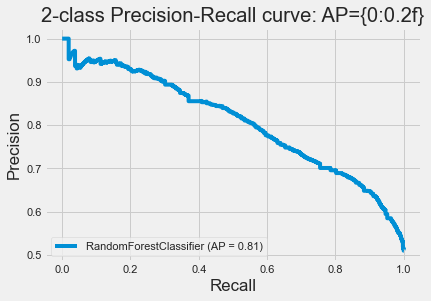

In [69]:
disp = plot_precision_recall_curve(model, X, y)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}')

#### Cross-validation:

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

For all data

In [71]:
df = pd.read_csv('data_clean/fashion_for_DecisionTree.csv')
df_copy = df.copy()
target = df['is_open']
df = df.drop(['attributes','review_count', 'business_id', 'categories', 'city', 'hours',
       'name', 'h_tuesday', 'h_sunday', 'start_year', 'latest_year'], axis = 1)
features = df.drop(['is_open'], axis = 1)

X = features.copy()
y = target.copy()
model = RandomForestClassifier(n_estimators=1000, criterion='entropy')
model.fit(X, y)
predictions = model.predict(X)
precision = precision_score(y, predictions, average='macro')
print(f'Precision:{precision}')

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=None)
cross_val_score(model, X, y, scoring='precision', cv=cv)

RandomForestClassifier(criterion='entropy', n_estimators=1000)

Precision:0.8976056588702761


array([0.80983004, 0.80464481, 0.80823157, 0.80730594, 0.81198536])

For data without review data(count, stars)

In [72]:
df = pd.read_csv('data_clean/fashion_for_DecisionTree.csv')
df_copy = df.copy()
target = df['is_open']
df = df.drop(['attributes','review_count', 'business_id', 'categories', 'city', 'hours',
       'name', 'h_tuesday', 'h_sunday', 'start_year', 'latest_year', 'stars','review_count_group'], axis = 1)
features = df.drop(['is_open'], axis = 1)

X = features.copy()
y = target.copy()
model = RandomForestClassifier(n_estimators=1000, criterion='entropy')
model.fit(X, y)
predictions = model.predict(X)
precision = precision_score(y, predictions, average='macro')
print(f'Precision:{precision}')

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=None)
cross_val_score(model, X, y, scoring='precision', cv=cv)

RandomForestClassifier(criterion='entropy', n_estimators=1000)

Precision:0.7793446666696147


array([0.81415929, 0.81266608, 0.81067961, 0.80317041, 0.80833333])

# Additional (features)

Text(0.5, 0.98, 'Count and proportion of shops closed, grouped by bike parking availability')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


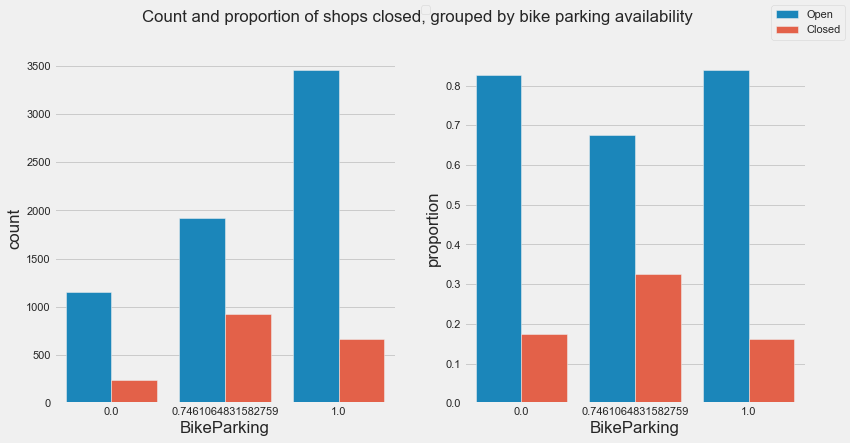

In [73]:
# extract information about avaliable street parking
#Extract information about restaurant price around the shop
df = pd.read_csv('data_clean/fashion_for_DecisionTree.csv')
attribute = 'BikeParking'
# l_bike = []
# for dict_att in df_fashion.attributes:
#     try:
#         l_bike.append(int(ast.literal_eval(ast.literal_eval(dict_att)[attribute])))
#     except:
#         l_bike.append(np.nan)
# # add new column to the datafarme       
# df_fashion[attribute] = l_bike

# plot data: total ammount and proportions of shops closed and open grouped by garage
# df = df_fashion
x, y, hue = attribute, 'proportion', 'is_open'
hue_order = [1, 0]

fig, axes = plt.subplots(1,2,figsize=(12,6))
fig.legend(('Open', 'Closed'), loc='upper center')
fig.suptitle('Count and proportion of shops closed, grouped by bike parking availability')
# first subplot
sns.countplot(x=x, hue=hue, data=df,hue_order=[1,0], ax=axes[0])
axes[0].get_legend().remove()

# second subplot
prop_df = (df[hue]
           .groupby(df[x])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df,hue_order=[1,0], ax=axes[1])
axes[1].get_legend().remove()

fig.legend(('Open', 'Closed'), loc='best')
plt.savefig('fig/Bike_parking.png', dpi=300, bbox_inches = "tight")

Text(0.5, 0.98, 'Count and proportion of shops closed, grouped by bike parking availability')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


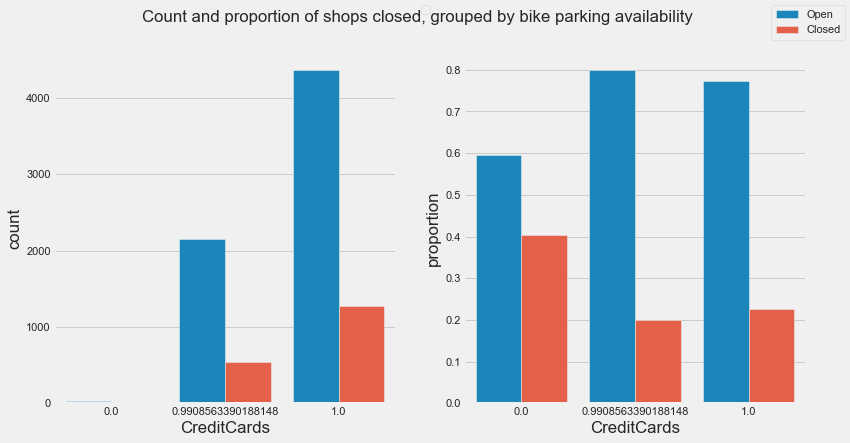

In [79]:
# extract information about avaliable street parking
#Extract information about restaurant price around the shop
df = pd.read_csv('data_clean/fashion_for_DecisionTree.csv')
attribute ='CreditCards'
# l_bike = []
# for dict_att in df_fashion.attributes:
#     try:
#         l_bike.append(int(ast.literal_eval(ast.literal_eval(dict_att)[attribute])))
#     except:
#         l_bike.append(np.nan)
# # add new column to the datafarme       
# df_fashion[attribute] = l_bike

# plot data: total ammount and proportions of shops closed and open grouped by garage
# df = df_fashion
x, y, hue = attribute, 'proportion', 'is_open'
hue_order = [0, 1]

fig, axes = plt.subplots(1,2,figsize=(12,6))
fig.legend(('Open', 'Closed'), loc='upper center')
fig.suptitle('Count and proportion of shops closed, grouped by bike parking availability')
# first subplot
sns.countplot(x=x, hue=hue, data=df,hue_order=[1,0], ax=axes[0])
axes[0].get_legend().remove()

# second subplot
prop_df = (df[hue]
           .groupby(df[x])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df,hue_order=[1,0], ax=axes[1])
axes[1].get_legend().remove()

fig.legend(('Open', 'Closed'), loc='best')
plt.savefig('fig/Bike_parking.png', dpi=300, bbox_inches = "tight")

Text(0.5, 0.98, 'Count and proportion of shops closed, grouped by bike parking availability')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


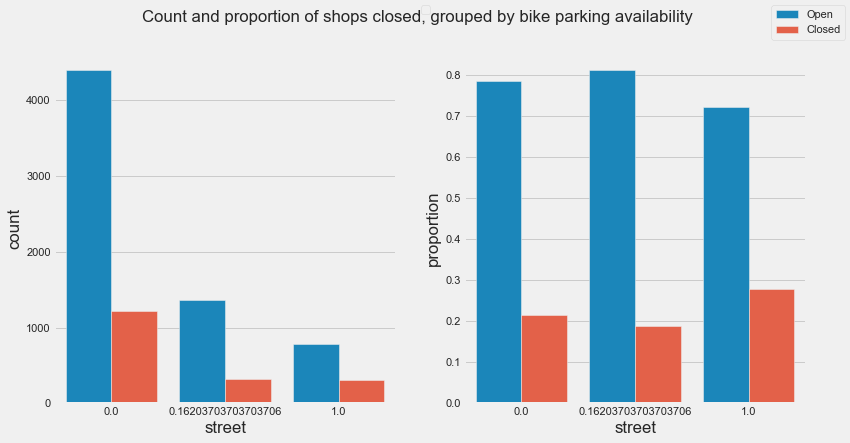

In [81]:
# extract information about avaliable street parking
#Extract information about restaurant price around the shop
df = pd.read_csv('data_clean/fashion_for_DecisionTree.csv')
attribute = 'street'
# l_bike = []
# for dict_att in df_fashion.attributes:
#     try:
#         l_bike.append(int(ast.literal_eval(ast.literal_eval(dict_att)[attribute])))
#     except:
#         l_bike.append(np.nan)
# # add new column to the datafarme       
# df_fashion[attribute] = l_bike

# plot data: total ammount and proportions of shops closed and open grouped by garage
# df = df_fashion
x, y, hue = attribute, 'proportion', 'is_open'
hue_order = [1, 0]

fig, axes = plt.subplots(1,2,figsize=(12,6))
fig.legend(('Open', 'Closed'), loc='upper center')
fig.suptitle('Count and proportion of shops closed, grouped by bike parking availability')
# first subplot
sns.countplot(x=x, hue=hue, data=df,hue_order=[1,0], ax=axes[0])
axes[0].get_legend().remove()

# second subplot
prop_df = (df[hue]
           .groupby(df[x])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df,hue_order=[1,0], ax=axes[1])
axes[1].get_legend().remove()

fig.legend(('Open', 'Closed'), loc='best')
plt.savefig('fig/Bike_parking.png', dpi=300, bbox_inches = "tight")

Text(0.5, 0.98, 'Count and proportion of shops closed, grouped by bike parking availability')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


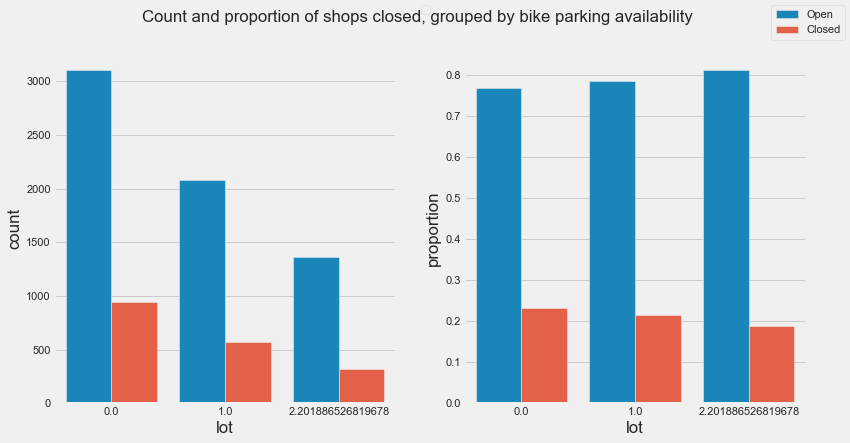

In [82]:
# extract information about avaliable street parking
#Extract information about restaurant price around the shop
df = pd.read_csv('data_clean/fashion_for_DecisionTree.csv')
attribute = 'lot'
# l_bike = []
# for dict_att in df_fashion.attributes:
#     try:
#         l_bike.append(int(ast.literal_eval(ast.literal_eval(dict_att)[attribute])))
#     except:
#         l_bike.append(np.nan)
# # add new column to the datafarme       
# df_fashion[attribute] = l_bike

# plot data: total ammount and proportions of shops closed and open grouped by garage
# df = df_fashion
x, y, hue = attribute, 'proportion', 'is_open'
hue_order = [1, 0]

fig, axes = plt.subplots(1,2,figsize=(12,6))
fig.legend(('Open', 'Closed'), loc='upper center')
fig.suptitle('Count and proportion of shops closed, grouped by bike parking availability')
# first subplot
sns.countplot(x=x, hue=hue, data=df,hue_order=[1,0], ax=axes[0])
axes[0].get_legend().remove()

# second subplot
prop_df = (df[hue]
           .groupby(df[x])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df,hue_order=[1,0], ax=axes[1])
axes[1].get_legend().remove()

fig.legend(('Open', 'Closed'), loc='best')
plt.savefig('fig/Bike_parking.png', dpi=300, bbox_inches = "tight")

Text(0.5, 0.98, 'Count and proportion of shops closed, grouped by bike parking availability')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


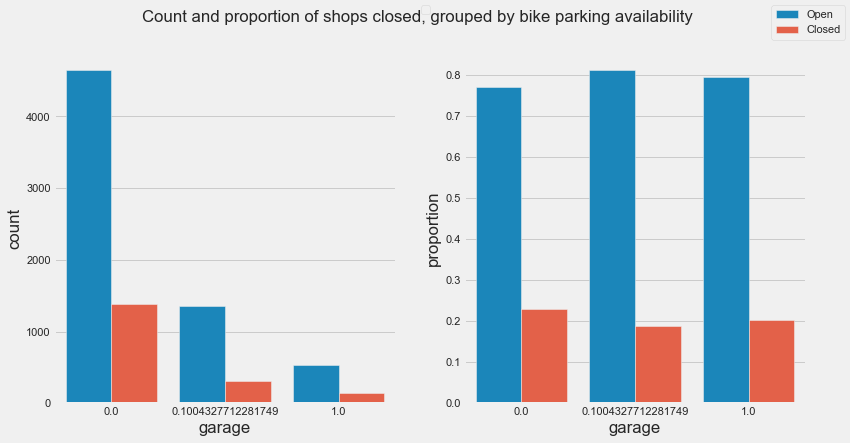

In [83]:
# extract information about avaliable street parking
#Extract information about restaurant price around the shop
df = pd.read_csv('data_clean/fashion_for_DecisionTree.csv')
attribute = 'garage'
# l_bike = []
# for dict_att in df_fashion.attributes:
#     try:
#         l_bike.append(int(ast.literal_eval(ast.literal_eval(dict_att)[attribute])))
#     except:
#         l_bike.append(np.nan)
# # add new column to the datafarme       
# df_fashion[attribute] = l_bike

# plot data: total ammount and proportions of shops closed and open grouped by garage
# df = df_fashion
x, y, hue = attribute, 'proportion', 'is_open'
hue_order = [1, 0]

fig, axes = plt.subplots(1,2,figsize=(12,6))
fig.legend(('Open', 'Closed'), loc='upper center')
fig.suptitle('Count and proportion of shops closed, grouped by bike parking availability')
# first subplot
sns.countplot(x=x, hue=hue, data=df,hue_order=[1,0], ax=axes[0])
axes[0].get_legend().remove()

# second subplot
prop_df = (df[hue]
           .groupby(df[x])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df,hue_order=[1,0], ax=axes[1])
axes[1].get_legend().remove()

fig.legend(('Open', 'Closed'), loc='best')
plt.savefig('fig/Bike_parking.png', dpi=300, bbox_inches = "tight")

Text(0.5, 0.98, 'Count and proportion of shops closed, grouped by bike parking availability')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


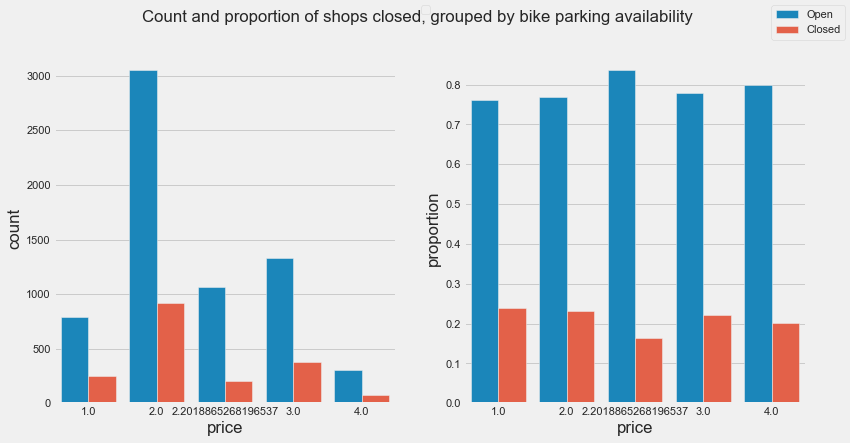

In [84]:
# extract information about avaliable street parking
#Extract information about restaurant price around the shop
df = pd.read_csv('data_clean/fashion_for_DecisionTree.csv')
attribute = 'price'
# l_bike = []
# for dict_att in df_fashion.attributes:
#     try:
#         l_bike.append(int(ast.literal_eval(ast.literal_eval(dict_att)[attribute])))
#     except:
#         l_bike.append(np.nan)
# # add new column to the datafarme       
# df_fashion[attribute] = l_bike

# plot data: total ammount and proportions of shops closed and open grouped by garage
# df = df_fashion
x, y, hue = attribute, 'proportion', 'is_open'
hue_order = [1, 0]

fig, axes = plt.subplots(1,2,figsize=(12,6))
fig.legend(('Open', 'Closed'), loc='upper center')
fig.suptitle('Count and proportion of shops closed, grouped by bike parking availability')
# first subplot
sns.countplot(x=x, hue=hue, data=df,hue_order=[1,0], ax=axes[0])
axes[0].get_legend().remove()

# second subplot
prop_df = (df[hue]
           .groupby(df[x])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df,hue_order=[1,0], ax=axes[1])
axes[1].get_legend().remove()

fig.legend(('Open', 'Closed'), loc='best')
plt.savefig('fig/Bike_parking.png', dpi=300, bbox_inches = "tight")

Text(0.5, 0.98, 'Count and proportion of shops closed, grouped by bike parking availability')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


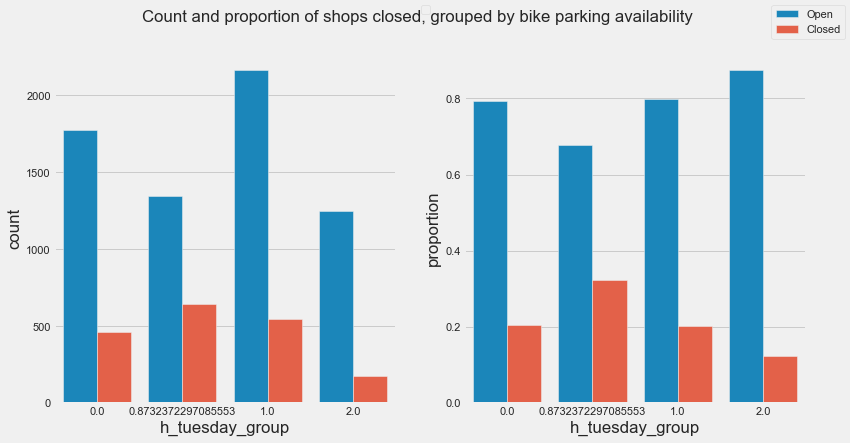

In [85]:
# extract information about avaliable street parking
#Extract information about restaurant price around the shop
df = pd.read_csv('data_clean/fashion_for_DecisionTree.csv')
attribute = 'h_tuesday_group'
# l_bike = []
# for dict_att in df_fashion.attributes:
#     try:
#         l_bike.append(int(ast.literal_eval(ast.literal_eval(dict_att)[attribute])))
#     except:
#         l_bike.append(np.nan)
# # add new column to the datafarme       
# df_fashion[attribute] = l_bike

# plot data: total ammount and proportions of shops closed and open grouped by garage
# df = df_fashion
x, y, hue = attribute, 'proportion', 'is_open'
hue_order = [1, 0]

fig, axes = plt.subplots(1,2,figsize=(12,6))
fig.legend(('Open', 'Closed'), loc='upper center')
fig.suptitle('Count and proportion of shops closed, grouped by bike parking availability')
# first subplot
sns.countplot(x=x, hue=hue, data=df,hue_order=[1,0], ax=axes[0])
axes[0].get_legend().remove()

# second subplot
prop_df = (df[hue]
           .groupby(df[x])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df,hue_order=[1,0], ax=axes[1])
axes[1].get_legend().remove()

fig.legend(('Open', 'Closed'), loc='best')
plt.savefig('fig/Bike_parking.png', dpi=300, bbox_inches = "tight")

Text(0.5, 0.98, 'Count and proportion of shops closed, grouped by bike parking availability')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


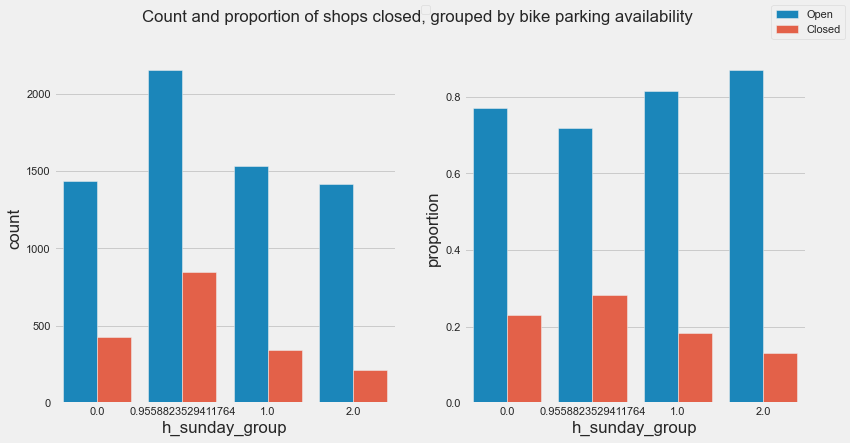

In [86]:
# extract information about avaliable street parking
#Extract information about restaurant price around the shop
df = pd.read_csv('data_clean/fashion_for_DecisionTree.csv')
attribute = 'h_sunday_group'
# l_bike = []
# for dict_att in df_fashion.attributes:
#     try:
#         l_bike.append(int(ast.literal_eval(ast.literal_eval(dict_att)[attribute])))
#     except:
#         l_bike.append(np.nan)
# # add new column to the datafarme       
# df_fashion[attribute] = l_bike

# plot data: total ammount and proportions of shops closed and open grouped by garage
# df = df_fashion
x, y, hue = attribute, 'proportion', 'is_open'
hue_order = [1, 0]

fig, axes = plt.subplots(1,2,figsize=(12,6))
fig.legend(('Open', 'Closed'), loc='upper center')
fig.suptitle('Count and proportion of shops closed, grouped by bike parking availability')
# first subplot
sns.countplot(x=x, hue=hue, data=df,hue_order=[1,0], ax=axes[0])
axes[0].get_legend().remove()

# second subplot
prop_df = (df[hue]
           .groupby(df[x])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df,hue_order=[1,0], ax=axes[1])
axes[1].get_legend().remove()

fig.legend(('Open', 'Closed'), loc='best')
plt.savefig('fig/Bike_parking.png', dpi=300, bbox_inches = "tight")